In [1]:
import argparse
import array
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys

In [12]:
img_string = r"M3QedAZ0BHQEdAl0/HMCdDF0rHSadVh2e3Zudkx2OHZIdjp2JXY1djN2QnZEdnl2fXZ/dnR2THYZduR1rXVtdSJ1CXXndNB0sHSTdJF0jHSTdHF0eXSOdIJ0uXRjdVJ2s3aHdjV22nWedVB1JnXydJt0YHQxdNlzzHPIc8FzynO/c8xz23PMc9Fz0XPkc9VzzHPTc8ZzxnPKc79zxHPGc8pzxnPGc8ZzvXPec9Vz2XPXc9dz3nPMc9tz2XPkc+Rz2XPqc+Jz4nPqc+9z8XP1c+1z83Pzc/Nz6nPxc+Bz13Pec9Fz6HPVc8hz1XPZc9tz5nPVc8Zz4nP1c/Fz13Olc5JzhXODc3hzeHN4c6FzrHPEc9VzynPVc9NzynPic8ZzynO9c+Jz13Pbc+BzyHPOc9FzyHO9c7lzsnPGc79zo3M3dBp0AnQVdPpzBHT8c/xzPHS7dKB1TnZCdlJ2KXYbdh12D3YVdhl2LXYvdkx2ZHZydm52cHZSdiN2/XXWdaV1bXVBdQl14XTGdKZ0l3SVdIZ0jHR7dJ10pnRIdRl2gXa/do12OHbDdZJ1WnUide50pHRmdC905nPMc7tzvXO7c71zxnPIc8Rz03PTc9NzxnPMc85zynPVc8pzu3O5c71zynO5c8xzv3PIc9Fz23Pbc9Nz0XPXc9Nz13Pbc+Rz13Pmc9lzynPec+Jz4HPoc+9z7XPqc/Fz8XPic/Fz5HPkc+Rz4HPgc+Jz6HPVc+Bz4nPgc9Fz0XPZc+hz7XO3c6NznXOMc45zdnOHc5BzrnO1c+hz4nPOc9tz2XPRc9VzxHPEc9NzyHPic8xz0XO/c8Rzt3PGc8FztXOhc6pzvXO3cxd0CXQTdBF0AHQEdPpzAnQtdOd00HVAdit2I3YpdhF2GXYZdhl2DXYVdjV2RnZKdkZ2UnZsdkZ2IXb5deB10HWUdV51LHX8dNt0tXSddJ10hnSMdJN0k3TudOh1YnaddsF2aHYRdsN1kHVYdRF11HSVdFl0KHTmc8ZzvXPEc7dzxnO/c71zu3POc9dzu3O5c71zvXO7c7dzxnPEc71zrHO1c65zsHO3c8hz0XPXc95zzHPOc8ZzzHPEc85zynPKc8xzvXO3c8FzxHPTc9Nz5nPec+Bz6HPic+Jz6nPic+Zz5nPkc95z4nPic9Fz03PTc85z1XPOc9Nz1XPGc5lzg3N8c3hzZXNyc3Jzh3Owc8Rz23POc8pz2XPOc8pz3nPMc7JzsnO7c9FzznOqc6pzm3O/c7dzxnO7c7dzrHPKc7dzM3QVdA90HnQCdBN0/nMkdGZ0JnXmdRd2G3YfdhF2A3YRdhV2/3UFdhd2OnZOdj52M3Y6dkR2M3Yfdg12/3X/dcx1dXVBdRd15XS3dLB0mXSddJd0pnTrdJB1aHavdtV2t3ZidgN2tXWSdVB1GXXSdJl0V3QidO1z0XO/c7Vzv3PIc71zuXPGc71zv3O/c6xzwXOwc7lzwXPGc79zqnO7c8RzsnOwc7tzv3PKc85zyHPMc71zvXPBc7lzzHPIc71zznPBc8xzxnPec9FzxHPXc+Rz13PXc+Bz4nPqc+hz73Poc+hz73MAdNlz1XPTc9Nz03PZc8pzynPKc71zkHOMc4dzhXNyc29zknOWc8Zz23P1c+RzznPic8xz7XPOc6xzpXO5c8ZzznPMc8ZzsnO7c8Fzv3O3c65zu3O/c8Rzu3MvdBV0D3QPdAZ0F3QEdBF0pHSYdQl2G3YLdgl2B3YLdg12D3b9dRF2L3YtdkJ2OnY1djp2M3YfdiF2CXb7dQ926HWYdVR1IHUAdcx0t3SudKp0qnS9dG91Yna5dsd253addkJ28HWtdYR1O3X8dMx0hnRbdAl013O9c8ZzxHPIc9FzynPBc7tzsnO/c7tzv3Osc6hzrnO/c7dzzHO9c8ZzsHOsc6xzwXPGc9Nz2XPRc85zxnO7c71zwXPGc8hzxnPIc7dzu3PIc8xz03PIc8Zz23PZc9lz2XPVc/Vz6HPkc+1z9XPoc+9z5nPZc9Vz6HPic9lzznPKc79zo3OOc4dzbXN/c3hziXOOc65z2XPtc/Nz7XPoc+9z5nPec9Nz0XO5c7JzwXPTc9Fz0XPEc7lzxnO5c7lzv3PEc8RzyHO3czx0HHQkdB50D3QkdCJ0anQodfB1EXYXdht2E3Ybdg92E3b/dQN2I3Y4di12M3Y+djp2K3Yjdgd2/3UFdvR1C3bodbt1aXUzdfh0wXTEdLl0uXTOdDl1L3bFdut24XbTdpt2K3bqdY51SnUFdcp0pHR5dE1083PMc7VzqHOsc7BzyHPIc8FzuXOwc7dzuXO7c7JzsHO9c7VztXPKc79zsnOyc7dzt3PIc8ZzznPIc8pzvXPKc7lzxHO5c79zu3O7c8FzvXOuc7tz03PKc8Zz0XPec85z0XPmc9Vz6nPic/dz5nPmc/pz8XPqc+Bz6HPkc95z23Pgc7lzrHOdc4NzenNpc3RzeHN4c5RzxnP1c/5z+nPoc+9z8XPkc9dz03O7c8RzxnPGc9lzyHPVc7lzwXPEc8Fz03PGc85zt3PGc7dzQHQzdCB0IHQodEh0eXTndOZ1HXYtdiF2G3Yhdhl2J3YVdgl2DXYxdjN2J3Ypdjx2MXYvdiN2DXYNdvl1/XUFdvl1znV7dTd1AnXbdM50ynTQdBl19HXNdvF2+3bddtN2kXYldrd1XnUVdd10xHSVdGB0JnTic8hzu3Odc6xzuXPEc8ZzuXOqc65zrnOuc6hzsHOuc7Jzt3O3c7lzsHO5c85zvXO/c8Zz0XPVc8xzu3PEc79zt3O7c8RzwXPIc79zxnO5c7tzwXPMc8hzt3PKc95z6nPbc95z5HPgc+pz6nPkc+hz4HPoc+9z3nPic95z6nPgc9tzrHOSc4lzknN/c39zfHN0c5Jzn3Pecw10DXT8c/5zAnT+cwJ003PRc8hzvXPBc8hz03PEc8Rzv3PEc8xzzHPZc9Nz13PTc9VzrHNRdCZ0InQodDN0l3TndLN1I3Y1dlJ2VHZEdj52MXYvdiF2GXYtdj52UHYvdjh2L3Yvdjh2H3YXdgF2B3b7dQd2FXYRdqV1UnUTddZ01HTwdA115HW3dvt2+Xbxdtt2wXZ0dtp1jHU5dfp00nSudHN0PHT6c9dzuXO3c51zt3PGc85zvXPGc7tzvXOyc6pzqHOqc7BzrnO1c65zqHOwc7BzsnO7c8Fzv3PTc8pzyHO/c7Bzt3Oyc7lzyHO/c79zznO7c6pzsnO5c8RzxnOlc71zznPOc9Fz13PRc9dz6nPoc/Nz83Pmc95z13Pbc9tz0XPkc+hz13Olc51zhXNyc3pzdHN/c3xzlnOsc+RzBnQEdP5z/HMPdAZ083Poc8pzwXPKc8pzv3POc9VzzHPGc8RzyHPGc8hzwXPVc9FzznPEc0Z0MXRCdHd0kXQ3deJ1KXZidn12g3Z0dmR2SHZQdj52OHY+dkp2THZedkh2RHY4di12K3Ypdhd2G3YLdhF2I3Yrdkh29HV3df509HTddCJ10nWndv92H3f/du929Xazdjp2yHWEdTl1CXXMdKJ0aHQrdNdzvXO5c6hzoXOuc9VzynPOc8ZzwXO7c7lzqHO9c7Vzo3Ouc7Vzv3Owc65zu3O9c8FzsnPMc9Vz13PTc7tzvXPBc71zuXO/c71zynPGc8xzvXPKc9Nz1XPGc8ZzwXPKc8xzzHO9c9Vz4HPic+1z83Pgc+hz6nPkc+Zz3nPoc+9z3nPVc65zm3ODc2dzZ3Nrc3hzjHOjc9dz93MRdPxz9XMGdA10/nPxc/pz4HPTc79z1XPbc8ZzynPKc7BzsnPGc8ZzzHPKc8ZzzHPKc9FzTXRXdHd00HRcdQ92PnZqdo92i3aRdnJ2WHZedlJ2QnZKdlx2UHZidlx2SHZEdid2LXYjdi12HXYXdg92H3YvdkJ2bnZIdqJ1+nTldCR1yHWldvN2E3cTd+926Xbjdod2CXa3dXV1LnXydMZ0inRbdAZ0ynPBc7BzsnOoc65zznO/c8Fzv3O1c7lzvXO9c6xztXO5c6hzqnOsc7Jzt3Ouc7dzzHO7c8RzyHPOc8FzvXO3c7tzuXO1c79zv3O/c8Zz13O5c71zv3PBc79zxHPIc71zt3PBc8hz23Poc9lzynPTc9dz4HPbc+hz5HPgc/Nz2XPXc8ZzqnOSc39za3N2c29zhXOSc6Fz7XMAdAR0/nPzcxN0/HMCdO1z4nPXc8Zz03Pic9tzynPIc7dzwXPKc7tzyHPKc9VzzHPEc9VzwXNgdIp053SQdSN2dHaJdpN2nXabdpF2g3ZydnJ2WnZadmR2gXZwdnB2bnZ0dmx2RnYzdi12J3YldkR2OHYzdi12OHaPdmJ2onUAdfp0b3WNdgN3E3cLd/124Xbxdr92ZHYBdqV1UHUNddJ0rHSIdEZ08XPOc71zvXO3c7Vzu3PGc7JzsnO3c7lzt3PGc8ZzrnPGc65zv3O5c8FzsHOsc6hzv3PEc8RzzHPIc7lztXOyc6hzsnOwc8Rzv3PEc7JzwXPEc7lzqnO1c65zt3O9c7VzwXPOc9Nzv3PXc+Zz3nPXc8ZzwXPRc79z13Pbc9dz23Pic8hzuXOUc4xzZ3Nlc2JzdHOHc59zynMEdA90AnTtc/NzBHTzc+Jz9XPvc+BzznPbc9Vz3nPEc7tzuXO/c7tz1XPMc8Zz23PMc8hz23O7c5d0EXWgdTx2gXaldpN2o3apdpt2n3aLdoF2cnZydn12j3aBdnB2fXaLdpt2kXZadjp2K3Yjdil2M3Y1dit2NXZkdod2THZndfp0C3Xkdc92AXcVdwV38Xbddtl2h3Y+dtx1d3UsdeN01nSsdHV0LXTKc7lzt3O/c8xzwXPEc7lzuXO3c7dzrnO7c8xzrHOwc7BzsnO5c7lztXO5c7dzrHO/c7tzyHPGc7dzsHOyc6hzqHOyc7VztXO1c79zv3O9c8xzsnOwc6hzsHOuc7dzv3PGc9lzynPVc95z6HPoc9Vz1XO9c8hzwXO/c9lz13Pbc8pzyHOsc5Jzh3N4c1pzZ3Npc3pzoXPRc/5zAHQGdPpz+nMEdPVz8XPic9lzyHPRc85zzHPRc9FzuXPGc7tzwXPMc8hzyHPEc9tz0XPBc8xzHnXYdTh2i3abdr12r3ardql2lXaRdnt2i3ahdqN2m3aDdoV2iXaRdot2i3Z9dlh2RnYxdit2JXY4djF2PnZQdoN2bHYLdiJ1+HRQdVp283YTdwV37Xb5dul20XZwdg12tXVadSx1+HTZdJ10XnT+c8FzsHOuc71zynPGc8pzxnOsc8FztXOwc71zwXOuc7JzrnOjc8Fzt3O5c8pztXPEc8pzxHPGc7tzsHOsc65zrHOyc7VzqHOwc7lzt3PBc79zuXOyc7lzqnO3c7BzpXPKc8ZzynPIc9Fz2XPoc+pz3nPVc8xzu3O5c7VzwXPGc79zznO5c59zh3N0c2JzYnNtc39zm3Ooc+1z/nMCdPxz93MCdA90/HPoc+Bz23PBc9Vz0XPIc9VzznOyc7JzyHPGc85z0XPTc9Vzv3O9c85z0XPOdUB2j3ardsV2w3azdqV2mXaTdoF2hXafdrV2q3aRdnR2fXaNdoF2i3Zodlx2RnY8did2K3YjdiN2HXY+dmx2Wnb/dUx1AnX2dKJ1sXYLdwN383bvduV25XaldkR25HWMdUh1DXXQdLB0cXQvdNVzxHOuc6pzrHO5c79zu3PGc6pzpXOlc7dzv3O5c6FzmXOhc6pzsHOyc7JzsHO1c7dz03PVc8Fzu3OZc51zpXOuc6hzqnOoc7JzrnOwc7lzsnOuc65zt3O5c6xzrHOqc7Jz03POc8Zz3nPMc9lz1XPRc8ZzynPIc71zvXOuc7Jzt3O9c6VzlnNvc3RzZXNac2tzb3OQc71z0XP6c/Vz6HP3c/Fz/HPgc95z4HPKc9tzynPMc71zxHPIc7Vzu3PEc79z4HPkc8xzynPIc7lzzHPIcyV2hXazdr92xXa/dq92n3aXdo92iXardsV2zXafdnR2YHZYdlh2WnZWdkJ2QnYxdil2J3YjdgV2/3XsdeZ14nWldRl1+HTydEF1ZnbddgN39Xb3dv9273bLdnJ2F3a9dX11JnXydLB0lXRedA9003PKc7lzrHO1c7dzxHO5c8Zzt3Osc71zxnPBc7dzsnOyc6hzmXOsc6xzo3O/c7dzxnPbc9NzvXO5c6NzoXOhc45zqHOlc6hzo3O/c6xzsHOuc6pzsHO1c65zrHO9c79zxnPKc9tz4HPVc9lz4HPKc9tz3nPVc85z03PMc8RzrHOlc65zn3OHc4FzXnNnc1pzbXODc6pz03Pgc+Jz03Pzc/Vz9XPzc+9z6nPic9NzznPZc+Bzv3POc8Fz03PGc8Zz03Pec8Zz13PRc8FzzHPMc9NzUnaVdr92z3bddsV2q3ajdpl2l3ardr9213bLdqt2iXZmdkJ2QnYtdh92G3YZdgt26nXgddB1tXWgdXV1VnUsdfh0+HTwdCp1EXbRdg13A3fxdu128XbhdqN2NXbodaV1WnUNdeV0m3R3dCt05nPOc8Zzu3O3c8pzu3O7c79zt3O9c7dzsnOwc7lzrHOsc6VzpXOqc8FzqHOsc7tzzHPBc85zzHO9c7dzrHOjc65zlHOfc6FzoXOdc65zrHOqc6pzqHOlc7lztXO5c7BztXPIc9lz2XPRc95z3nPOc9Nz03POc8pz1XPZc9NzuXPEc6pzpXOfc3xzZ3Nvc21zb3N4c5JzsnPKc9dzznPZc+Zz7XP1c/xz5nPVc7lzznPZc9NzyHPRc8xzsHO7c8xzznPKc9FzzHPRc8xz13Pmc9tz2XOBdrN2u3bVds12zXaxdqF2o3aldsN2z3bZdtF2s3aVdmh2RHYxdv917nXmddJ1vXWgdY51e3V9dVh1PXUVdQB18nTpdCZ13HXFdgN3F3cNd9l253bvdtd2cHb/dbd1gXUqdel0t3SGdFl0/HPVc9VzyHO1c7BzvXO3c79zwXO9c7Jzt3O3c8RzsnOuc7lzo3Olc7VzwXOuc7dzv3O/c8ZzzHPTc7VzsnO3c7VzsnOsc6VzqnOhc5JzoXOwc6NzsnOlc6hztXOoc7dzrHO/c8pz4HPic95z4nPOc8xzznPic9VzxnPRc9Nz13PXc8hzqHOfc45zbXN0c2lzdHNlc4dzoXPIc9lz13PXc+Jz4nPgc+pz73PVc85zzHPRc9lz0XPKc85zvXPOc8hz03PGc8ZzynPVc+BzxHPic9lz3nPec5t2sXbFds12t3a/dql2pXatdrN2xXbBdsF2x3a1dpl2j3Zodg12ynWYdW11WnVWdVp1RXVDdSp1LHUZdQV1+HThdPZ0inWddvl2IXcZdwV333bjdtF2m3Yrds51dXUzdfh0rnSIdEh0L3Tqc9lzyHPEc7VzwXO5c8FzynO5c79zxHOqc65zsHO1c7dzpXOlc6Nzo3O3c6xzrHO7c79zzHPOc7lzsnOuc8FzwXOsc7dzt3O5c6pzlnOWc6hzpXO1c7VzpXOlc65zqnO9c79zyHPTc9lzznPKc8pzynO9c9Nz23Pbc9dz0XPEc9FzwXO3c6hziXN8c1xzbXNtc3Jzh3Olc8xz03PIc+Bz3nPbc9dz6HPic9VzynPIc9Vz6HPbc8RzynPZc9Fz0XPec9Vz1XPRc9NzzHPOc+RzzHPic95zn3axdrt2u3abdq12kXaXdqF2m3atdq92p3ahdpd2m3aLdlh26HVYdR51AnX8dBx1IHURdSR1C3X8dPp08nTndPJ0DXUJdv92I3cvdxN3/XbpduN2p3ZWduR1onU5dQd1zHSVdF50QnQNdNtz5nPbc8xzv3O5c7JzznPGc71zyHO5c71zxnO5c7JzyHO9c7tzn3Olc6pzsHO3c7tz03PKc9tzxHOuc7dzt3O1c7dzrHO9c6hzqnOwc7BzqHOuc6Nzt3Oqc65zsHO7c79zznPTc9Vz4HPXc9tz0XPKc9FzxnPTc8xz13PTc+Zz3nPBc6hzm3OMc29zdHNnc4Fzg3Obc7Vz0XPkc+Rz2XPoc95z3nPkc+Rz4nPmc+Bz4HPbc+ZzynPOc9tz23PRc9lz0XPXc85z13Pkc+9z4HPkc+1z23OFdo92nXaVdn12gXZ/dn92gXaFdol2jXaFdpF2j3aJdn12B3ZUdfB0xHTEdNl08HTudPR043ThdN905XTSdOd08nRadXt2FXc5dyV3C3f5duF2vXZqdgd2lnVedfh00nSMdFF0NXT+c+1zzHPVc9tz23PIc71zt3PGc7lzwXO/c85zrnPBc8hzrnO1c7BzsnO9c7BztXOyc8ZzynPic8xzyHO5c7lzsnOuc8RzsnOwc7JzsHOoc7BzsnOyc7dzrHOyc6hztXOyc7Jzv3PGc9Fz1XPbc9tz03PZc9dzznPGc8xzv3POc8ZzzHPEc6xzkHN/c39zaXN4c2tzf3OJc6hzwXPXc9Nz03PTc+Bz1XPZc+Jz4HPXc+9z5nPkc95z0XPIc8ZzxnPTc9Vz1XPVc85zynPMc+Rz5HPOc9Fz4nPkc2Z2ZHZsdmZ2WnZYdlx2SnZYdmJ2YHZgdnZ2f3aNdoV2NXZedeV0rHS1dLV0ynTUdON00nTZdNR03XTndNt02XT+dKB15XYzdy13D3ftduV2u3aHdi12vXVFdQ11v3SOdDF0/nPqc9tz0XPKc8RzznPKc8hzynPOc9lzyHO1c7lzsnO1c79zvXOqc65zvXOqc6hzqnO7c8hzzHPZc85z13O/c7BzuXOlc7JzvXOwc65zrHO1c6NzqHOoc8Rzv3Owc7JzsnO3c71zsnPBc8hzznPbc95z7XPXc9Vz0XPMc9tz13PZc9Vz03O7c79zpXOSc3RzfHN6c29zdHODc5JzrnPIc9Nz4HPic+Rz6HPmc9Nz4nPic+hz3nPZc+Zz5HPgc9VzyHPKc+Rz1XPkc+Bz5nPmc+Jz73Pbc9Vz23Pxc+hzOnZAdkR2SnY4dj52OnZEdjx2SHZUdlp2ZHaFdoV2UHaSded0tXSodJN0mXSudKp0yHTKdMZ0wXTIdNB0xHTOdAV1JXYRdyt3H3f7dtV2vXZ7dj521HV1dRN1uXRidDl09XPbc9lz0XPZc9NzxHO7c8xzuXPIc9dz3nPGc7Jzv3Oqc7lzxnOwc7BzqnOjc6pzrnO9c7tzu3PMc9Fz0XOsc5BzqnOfc6xzrnPIc6VzrHOsc6VzrHOuc65zqnOuc6pzt3O3c6pzxHO7c8RzxnPVc8xzzHPTc8Rzv3PMc9tz03PKc85zynPXc7dzrnObc4NzfHN0c29zcnNpc4FznXO9c8xzzHPKc9lz13Poc9NzzHPVc9dz23PZc+Jz3nPmc9dzxnO9c8hz3nPTc95z0XPZc+Jz0XPZc9Vz2XPOc9lz13Mndh12J3Y6diV2H3Yldit2K3YldkR2RnZsdnZ2cHbodfZ0onSOdI50m3SmdK50u3SwdLB0tXS7dMx0v3TBdOV0RXWXdiV3FXcNd9t2s3abdkB27HWedWB1CXWudFV0F3Tmc+Zz23Pmc9Fz23PXc95zxHPBc7tzyHPTc8ZzwXO/c8Zz0XPKc7VztXO7c7lzqHOuc7tzznPBc9lz13PMc7dzn3Oqc59zqHOyc7VztXOlc7VzqHOyc6hzsnO/c7JzrHOoc6xzvXO9c8pzv3PMc85z03Poc9dzzHO/c8Rz13PRc9dz23POc9FzznO7c5RzgXNpc3Jzf3N/c3RzlHO3c85z23Pkc+hz5nPmc/5z7XPXc+Bz3nPic95z5HPic+Zz2XPVc9Vz73Pmc+hz4nPZc9Nz23Ptc9dz1XPgc85z3nPZcxV2IXYJdg12CXYRdg92D3YfdiV2PHZOdm52ZnYtdjd1pHR5dGh0e3SMdIh0lXSXdKZ0n3SudL10uXTGdMZ0+HTSdct2/3b5duF2qXZ7dlp2C3a3dW91O3XhdKJ0N3QLdOBz6HPbc+Rz03Pgc8ZzzHPVc71zsnPEc79zsnOyc9NzznPTc85zt3Owc7dzsHPBc7tzt3O7c8hz3nPKc8Fzt3O1c7Bzu3Olc7Bzm3Ojc6hzqnOoc8FzrHOqc7JzsHOdc65zsnO7c8RzynPGc85z4nPbc9Nz1XPIc9Nz1XPXc8RzzHPZc9tz1XPBc6pziXNrc3hzbXN0c2VzdnOdc8RzynPZc9dz4HPgc9lz83Pxc+Bz5nPTc9Vz5HPTc9tz3nPXc9Nz03Pmc9lz23Pmc9tz03PGc8xz4HPZc9dzxHPXc85z93Xydf91A3b3dQ12CXYRdiV2LXYzdlB2YnZadqJ1xHR1dHN0b3RqdIJ0iHSMdJ10onSsdKZ0rnS1dMR0ynQkdUx25XbTds92pXZsdlR2D3bDdXt1RXUAdbt0jnRNdBd02XPgc/Vz5nPgc+hz4HPgc9FzxnO9c8RzwXO5c7JzznPKc/Nz4HPEc7BztXO1c7tzu3O/c8ZzzHPbc8Fzv3Oqc79zrHO7c7JzrnOqc5lziXOSc6hzsnOlc65zrnO9c6VzrHOyc7lzv3PGc9FzzHPVc95zv3O7c8RzyHPXc8hzv3PEc8Zz2XPoc8Fzo3OOc29zeHN0c29zh3OJc6xzyHPKc9Nz23Pkc+Rz1XPic9tz03PTc8hz13Pec+hzznPmc95z5nPRc8xz83PXc9tz6HPRc85z0XPXc9Vz2XPEc8hzv3PUdex15nXqdfd1+3X0df91GXYndjN2SnZadvt1EXWTdGp0anR1dHV0b3R9dIR0jnSZdJ10k3SodKZ0sHTWdK11r3bBdqF2g3Zidjx2C3bMdYZ1SHUNdeF0qnR1dEZ0BnTZc+Zz9XPic/Fz6HPVc+pz23PTc79zzHO9c7tzvXPEc8RzyHPVc9tzuXObc7BzsHPBc8Fz03PZc9lzwXO3c6xzynO3c6pzsnOqc65zqnOMc4NzmXOfc6NzqnOyc6Vzo3Osc7JztXPOc8pzzHPZc8xzynOwc7JzrnPEc7tzzHPMc9dz03PVc85zqHOZc39zdnN/c3hzfHODc4xzu3PKc8Zz2XPbc+hz4nPZc95z1XPgc9dz23POc9NzzHPqc9dz0XPRc9Nz6nPVc9lzznPOc9dz13PMc9Vz13PRc7tzxHPEc+p13HXwde51+3ULdvJ1+XUfdiV2RnZGdhV2dXWudHd0cXRodGp0d3RsdIZ0gHSEdIR0inSOdJt0n3S9dB51M3aJdoN2YHZOdjV2CXbadZZ1UnUode50qnSVdGp0InT8c+Jz4nMCdPpz8XPic9lz23Pbc9tz1XPIc8xzxnPEc8Zzt3Owc6Vzu3Owc6Vzm3Ojc7Bzv3PTc9tz1XOyc8FznXO3c7Vzn3Obc59zrHOqc6pzrnOdc4lzmXOhc6pzo3Ooc7BztXPIc9FzyHPZc8FzznPIc8hzuXOlc51zoXOuc8RzzHPOc8hztXOjc4NzdnNtc3RzeHN6c45zqHPOc85z13PIc+Rz4HPgc+Rz4HPIc85zznPic9Fz13POc+JzzHPOc9FzznPZc+Jz4nPkc9dz4HPXc85zxHPVc8hzxHPKc7lz5HXodeZ16nXydQN2AXYBdht2K3Y1diF2v3XpdGh0ZHRkdGR0cXRkdGZ0e3R3dIB0hnSCdJl0k3SidLl0pXVYdk52SHYrdhd2A3bUdaB1ZXUudQV11HSOdGR0QHQPdNtzzHPgc/pzIHQNdPpz4HPic9tz5HPtc+hz4nPOc8xzxnO3c8RztXOyc8FzuXOwc6pzwXPRc+Bz0XO3c7VzuXO5c8FztXOoc51zqHOuc79zpXOwc65zpXOOc6pzt3O1c7lztXPEc71z13PTc9Fz23POc8FzynPEc8FzyHOlc7BzqHO/c7tzynO7c5Zzg3N8c3hzenN2c3xzmXOuc8pzyHPbc+pz5nPxc+9z4nPec9Vz0XPRc9dz0XPTc95z3nPRc8Zz1XPbc+Zz6nPbc+9z4HPoc9lz13PXc9tz0XPKc9Nzv3P0dfl1A3b9dQ92C3b9dQN2F3YddjV2CXZMdZl0U3RTdFd0UXRmdFV0dXRxdHl0dXR5dH10hnSTdJF0AHXidR92GXYFdvd14HWzdYh1aXU/dQl18nTBdHl0QnQxdPFz1XPXc+Jz0XPqcwt0IHQGdPxz6HPRc9Fz6HPkc9Nz5nPRc8hzuXO1c7lzznO7c71zv3PGc+Bz3nPKc7BzqHOyc7BzuXOoc7lzmXOhc6hzrHOuc5BzrHOZc65zu3PIc7BzuXPEc7Vzv3PEc8hzznPIc9tzzHPIc9lzyHPKc8hzu3Owc6VzrnPIc6NzmXN/c3pzeHN6c39ziXOlc7tzxHPXc+hz4HPmc/5z6nPVc+BzzHPRc9Vz23PVc9FzznPXc9dz0XPTc8xz23Pqc+Rz23PVc+Bz13PRc+Rz13PVc9dzyHPEcwN2/XUFdgN2B3YHdhV2C3YhdkR2IXbedeV0b3Q+dER0XnRZdGJ0c3RvdHd0eXR1dHd0dXSZdIZ0qHRzddR18nXedc51s3WcdXl1UHU5dRl15XTZdJt0c3QzdAZ083Pec9Nz3nPRc9dz5HP1cwR0F3QedPVz5nPgc+pz13Pmc+Rz13PMc8ZzyHO7c8hzznPVc85z3nPZc9NzqHOjc6Fzt3O/c7Vzu3Osc7BzrnO3c59zqnOhc59zpXOyc85zv3O7c8ZzxnPIc9Vz0XPXc9NzzHPIc8ZzsnPKc9lz13PVc9lzsnOsc6hzn3OSc4Nzg3N0c3xzeHOWc7BzzHPKc9Nz13Ptc/VzAnTzc9tz13PZc9Nz13PRc9lz23PTc+pz13Pbc8Rz2XPic+Rz6HPbc95z4HPkc+Jz7XPtc+Rz4HPqc9lz+XUHdvt1B3YFdgl2DXYNdht2RHYhdox1pHRKdER0PnRVdGJ0ZHRkdG90d3R3dG90aHR5dHd0kXThdLV1tXW5dZB1hHV7dXN1THUmdRN1+nS9dKh0gHQ1dP5z8XPoc+Rz4HPec9dzznPgc9lz23Pmc+hz73Pvc+pz4HPOc95z7XPoc+1z0XPZc8Fz1XPBc8xz13Pbc9lzxHPGc6VzpXOsc65znXOdc6xzuXO1c7VzpXOlc5ZzmXOjc6xztXOsc7lzvXPIc79z1XPEc8xz03PBc9VzynO/c8Rz2XPZc9Nz6HPVc7tzrHOHc4dzfHOBc3hzgXOOc6Vzu3PRc8xz13POc+Jz4nP8cwJ073PXc+Bz1XPbc9Nz1XPMc9Vz3nPOc8pzyHPZc+Bz4nPZc9dz13PVc+Bz5nPoc/pz73Pxc+Zz5nMFdvB1DXYDdgF2G3YFdgt2JXY4dhN2E3VsdEB0M3RIdEp0U3RvdGZ0aHR1dGx0bHRvdHV0bHSbdFR1oHWWdYF1VnVMdU51P3UkdQV19HTSdJV0gHRGdCB083PXc9Nz03PTc+Rz+nPic9tz3nPZc9lz1XPKc95zD3QRdNdz13POc8xz5nPZc9dz2XPXc8FzyHPbc+BzxnPEc8hzsHPBc7lzsHOdc6Vzt3Osc6xzvXO1c6NzsnOFc6NztXO5c6pzrHPMc9FzxnPZc9Fz0XO3c7JzyHPEc7dzynPKc9lz4HPtc9FzrnOWc4VzenN2c3hzdnN6c5BzsHPKc8hz23Pkc+Bz5HPZc+1z4nPkc9tzznPgc9dz3nPOc9lz23Pgc9Fz1XPMc+Jz23Pbc+Bz7XPbc+pz5nPkc+1z9XPvc+9z8XPqc9Z12HXudQF293UFdgd2C3YZdiN2w3WzdFt0PHRTdE10V3RVdGh0U3RgdGZ0aHRedHF0ZnRvdPR0aXVpdVZ1TnU1dS51KnUkdQV14XTUdKh0hHRmdDl0CXTXc9dz13Pic95z3nPTc+Bz23Pkc9tz2XPKc85zyHPXc+Zz0XPIc9VzwXPIc9Vz13Pkc+Rz4HPec9tz5nO7c8FzzHO5c8hzv3O/c65zsHOlc6FzrHOuc6pzoXOoc6NzmXO3c7VzpXO1c9dzxnPEc9FzxnO9c6NzpXOyc8RzynPgc8Zz2XMCdORzsnO3c5ZzjHOJc3ZzenODc4Nzn3O/c9Nz3nPXc+Bz23Ptc9tz6nPTc95z5HPZc+Jz4HPkc+Jz23Pkc9Nz03PZc9Vz5nPXc+Zz5HPgc+Jz13PvcwB073Pvc/5zBnQCdAZ0cXV/dad1rXWtdcx1znXodep193WQdZN0V3REdEB0TXRCdF50YnRXdFt0U3RPdFV0W3RidJl0InUsdUF1MXUedQV18nQJdfp023TBdK50mXRVdEp0E3T6c95zwXPgc+Bz0XPTc8pzyHPRc9tzynPxc8xzxnPOc9Vz7XPBc79zuXO3c7dzxnPMc8xz5HPZc+pz5HPZc71zzHPRc65zwXPMc8FzwXPBc65zqnOdc5tzm3Ojc6hzm3Oqc7BzrHOdc7Vz1XPRc8ZzznPTc85zrHOdc6FztXOwc7dzynPbc95zwXOlc59zknOFc5Jzg3OJc39zhXOsc8xz1XPZc9Vz6HPxc+hz4HP8c+Zz3nPec9tz93Pec+pz1XPec+Rz3nPTc9tz2XPec9lz6HPic+Zz5nPvc+pz5nPvcwB0+nMGdPdz3nP2dAV1InU7dTt1Y3VedXN1d3V3dRF1anRGdEh0RnRRdE10XnRodE90RnRbdEp0TXRgdHt00nQedQt1HnUCdfB08HTpdN9023S7dJl0jnRxdER0KHQEdOpz5nPic/dzE3T8c/xz1XPOc9dz4nPRc+Rz4nO/c8hz1XPxc79zxHPMc79zvXO5c8Fzv3Pgc+hz6nPzc+hz5HPXc8pzu3PBc8ZzwXPGc79zuXO/c6pzqnOfc6pzrnOlc7JzsHOsc7BzyHPXc85z1XPZc8Fz13O/c8xzuXOuc6hzsnO/c9dz2XPIc7BzqnOWc4FzkHOJc4xzjnOoc8hz3nPkc+Zz5HPzc/Vz7XPoc+1z2XPXc+Zz4nPic+hz4HP1c+hz3nPMc9lz4HPIc/Nz4nPoc9tz5nPZc85z7XP8c/dzC3T+cwB0AHT3c5N0pHS7dMp0ynTOdNJ04XT+dAl1xnRidDd0JnQ+dEZ0QHRTdE90V3RIdER0OXRGdGB0pnTrdAl1/nT4dOV02XTOdMF0uXSkdJl0gHRvdE90IHT+c+1z2XPec9lzBnQXdCR0K3QAdOJz5HPVc8hz0XPOc71z4nP3c9VzvXPKc8hz1XPRc8xzyHPEc+Rz3nPXc95z6nPtc+Zz4nPTc8xzzHO9c8ZztXOoc7VzsHO3c6pzrHO5c7BztXOwc6Vzu3PXc9tz2XPVc8Rz13PVc8xz0XPRc8Zzv3O1c6xzsHO7c7Jzn3Obc5BzjHN/c21zh3OUc6xz13PXc+Bz3nPgc+1z9XPtc+Zz6nPtc+1z2XPZc9lz4HPgc+1z7XPoc+pz23Pbc95z6HPic+hz5HPvc95z4HMAdP5zAnT6c+1z8XMCdO9zSnQ3dE10aHRmdHd0ZHRxdJF0pnSIdGJ0OXQ3dCh0JHQ8dE10SHQ8dDV0L3Q8dEJ0cXTGdNt043TUdM50v3S7dKZ0n3SGdGx0bHRedEB0JHTtc+Jz6HPmc8pzynPRc9tz+nMrdCB0GnT+c9Fz0XPEc7lzrnPGc+JzynPXc8hzyHPGc9dz2XPbc9Nz5HPic8xz2XPZc9tz23Pec9tz5nPbc7lzt3Ohc6xzu3O/c6pznXOyc6pzuXOuc7VztXO7c8pz0XPic8pzxnO3c79zyHPic9FzvXPKc8Zzt3Olc59zrnOHc4VzdHNtc4Vzh3OBc6VzvXPIc9Vz1XPec+pzAHQcdPxz5HPec+Jz4nPqc9dz3nPZc9lz03Pec9lz4nPbc9Nz0XPkc8xz4HPVc+Zz9XPZc/xz+nMEdPdz/nPqc/dz83MTdAl0CXQedC10NXQrdD50QnRTdFN0WXRTdDN0M3QodDl0NXQzdDV0NXQrdCh0UXSCdKR0s3TBdLB0n3SXdIR0dXRzdGx0YHRRdD50HHT+c+Bz2XPbc+Zz3nPEc9VzznPMc+pz+nMCdPxz73PTc85ztXO3c8pzyHO9c71zxnO5c8Rz23Pic+Rz1XPec9lzvXOyc71zynPOc9Vz3nPoc+Jz23PVc7JzrnOoc7VzsHOuc5ZzoXOuc7Jzv3PKc79zwXPRc8ZzxnPGc8FzrHO9c8FzxHPMc+BzynPTc8FzsHOqc59zg3Nyc29zbXOFc4xzqnPIc9NzyHO7c9Nz6nPgcw10HHTkc95z23Pic+Zz6nPgc9dz5HPic+Jz23PXc9lz1XPEc+Zz8XPic95z5nPgc+Zz+nPzc/NzBnT+c+1zAHTqc/dz7XP1c/dz/nMRdBF0FXQXdCJ0HHQrdEJ0NXQkdCZ0IHQvdCB0KHQidBx0KHRXdHd0hnSEdIp0lXR9dHd0YnRRdFd0RnQ+dCh0D3QPdP5z5nPec9lz03PRc9Nz4HPTc8Zz3nPVc95z4HPMc95zxnO9c7BzynO9c8RzxnPIc8pz3nPTc+Bz3nPmc+pz3nPkc8pzsHO1c7JzwXPTc9tz4nPbc+1z03PBc71zsnOuc6Fzo3Oqc7Bzt3O/c8Fz13Pec9tzynPOc9Nzv3PIc8RzvXO/c85z13PKc9VzznOqc6FzjnOJc4FzenOBc4lznXO5c9Nz23Pec9dzznPic+hz7XMAdPVz8XPic+pz6HPtc+pz23Pqc9Nz23Pbc9dz4HPvc+Rz3nPqc+Bz83P1c+Zz73Pzc/xzC3T8c/xz7XMJdO1z7XPqc95z5nPoc/dz83Pxc/Nz83PvcwB0BHQidCh0F3QLdCB0IHQkdA90C3QVdC10QHRVdGJ0SHRXdFl0QHRAdCh0L3QvdBN0/nP+c+pz4HPRc8xz2XPgc8ZzwXPEc8xzv3PZc8Fzv3O/c85zznO/c79zqHOuc7tzt3PEc8FzynPbc+Rz6HPec+hz5nPVc+RzyHPMc8hzu3Ofc7dzsnPGc8hz23PVc79zzHO/c7VzpXOjc59zqnO7c7Jzv3PXc9FzynPRc7VztXO7c79z03O3c8ZzvXPKc9Fz7XO9c7BzmXOSc39zgXODc4FziXOoc79z1XPXc9Vz13Pic+Zz5HPic95z5HPmc+Rz23Pmc95z/HPVc95zyHPVc9Vz13Pkc+Bz5nPic+Jz4nPec+Zz8XP1cwB08XP6cwR0/nPtcwB07XPvc9dz03PZc+1z6HPvc/Vz+nP8c+Jz4nP1c+hzDXQAdBV0BnQPdAt0BnTvc/Vz/HMadBF0M3QmdCt0MXQgdBx0BHT+c/dz/HP+cwJ073Poc+BzxnPVc95z03PKc9FzynPOc9dzxHPIc8ZzynPEc9FzvXOhc6pzrnO9c7BzxHPKc9Vz4nPec+Rz5nPRc95z03PEc8hz0XPMc8xztXOuc6xzxHO7c7tzzHPbc+Bz0XO3c6xzqHO/c6hzuXPGc9dz03PMc85zvXOlc5tzsHPGc7Jz0XPVc8RzznPOc6pzn3OQc4Fzf3OBc4lzf3OJc7BzynPmc9dz5nPZc+Zz93P3c+Zz5HPec+9z5HPkc95z5HPbc+Bz13PRc9tzznPOc+Rz4nPoc+Zz5HPic+hz93Pzc/dzAHQJdAB083P+c/pz73P3c+pz03PZc+hz9XPbc+hz4HPqc+Rz3nPec+Zz4nPec+Jz8XPic/Nz6HPbc+Bz13PRc+Zz5nMGdP5zAnT+c/Vz93Pgc95z83P3c/Nz73Pxc+hz3nPRc9tz5nPIc9FzyHPGc8xzwXO9c7tzzHPBc8FzyHO7c6xzo3Osc6xzqHO1c79zznPec+Bz23PZc8pz03O1c7BzwXPBc8FzvXPGc7tzvXOwc59ztXOqc6xz1XPIc9NzxHO7c7tzt3PGc85zzHPMc85zv3O7c7JzpXOdc51zrHO/c7tzyHPbc8FzpXOOc4VzdnOBc4Fzh3N6c5Rzu3PBc9Nz03Pic9lz4HPvc9dz5HPqc9tz3nPbc9dz6nPgc+hz2XPOc9VzznPZc9dz4HPkc9lz7XPmc+hz5HPxc/dz8XP8c/dzDXT3cwB0+nPtc+Bz4nPVc+Bz5nPqc/dz7XPvc/5z6nPmc+Jz7XPgc9lz3nPtc+Zz4HPVc+RzxnPMc9Nz1XPZc9tz4HPkc9tz2XPmc+1z5nPqc/Fz93Poc+Zz5HPOc9dz4nPmc9FzynPTc8pzxHO5c71ztXO9c8Fzv3PBc7tzsnPBc8RzvXPBc7VzqHO/c9dz2XPgc9dzyHPOc79zxHOwc7Jzu3O5c7tzt3PGc8pzrnOdc5JzoXOyc8hzynPXc9FzwXPIc8pzznPBc85zynO5c71zyHO7c7BzqHOjc51zo3Owc8pzn3Ojc4VzeHN8c3ZzfHOBc4lzqnPGc8xzzHPbc+Zz6nPqc9lz23Pic+Jz6HPZc+Jz1XPMc9Nz23Pmc9tzwXPTc9tz4HPVc9tz4HPec+hz6HPic/Nz/HPqc/Fz/HMGdPVzAnT+c/pz73Pxc9Nz6HP3c/VzBnT6c/dz+nPtc+hz3nPec9Nz13Pgc+Bz1XPic9lz1XPGc9dzznPTc9Fz23PXc9lz1XPbc9tz4nPqc/dz9XMCdOhz7XPkc9dz1XPic+9z5nP3c/dz1XPBc8ZzxnO3c8FzxnPGc79zyHPGc79zv3POc8xzyHPEc9Nz4HPic9VzvXO5c7lzwXPOc79ztXO7c8Fzo3O1c7tzyHOsc6hzqHOuc79zv3PEc8pzznPRc9Vz13PVc9Fz13PGc7dz0XPRc71zyHO9c7lztXOZc6NzrHOuc5lzhXN4c3JzhXOHc4lzlnO9c9Fz13PRc+Bz6nMJdA107XPec+Zz93Pvc+Rz2XPRc95z2XPMc+Jz23Pbc9Vz13Pic+Bz6nPmc+Jz6nP1c/Vz8XPxc/5zCXQAdPdzD3QAdPpz+nPvc+9z13Pkc+9z/HMAdAR0AHT+c+1z6nPtc+9z4HPZc9Nz23Pkc95z0XPVc9VzxHPgc+Bz2XPec9dz2XPmc9Vz13Pic/Nz8XP1c/5z83Pzc/pz5nPgc+Rz4nPVc+ZzC3Ttc8xzznPMc71z13PGc8pzv3Oyc7VzvXPGc9FzzHPTc+Bz4nPkc+9z13Olc6FzuXO5c8pzynPEc79zsnOdc6VzqnO7c6xzsHO3c8Fzv3PBc8pzxnPTc+BzznPTc+Jz2XPVc8hzt3POc8Rzt3Pgc8pz0XPMc65zqHOjc6FzlnOHc39zg3N/c4VziXOyc9lz1XPRc+Jz4HPmcxF0F3Tmc+Jz7XP3c9Nz8XPgc9lz6HPgc9dz2XPXc9tz23Poc+9z4nPec+hz5nPoc/Fz73Pxc/pzFXQAdPxzAnQCdAR09XPzc/Fz+nPZc+1z73MAdAt083PxcwB0+nPmc+Bz3nPoc+Jz1XPVc95z13PKc9dzynPGc9lz4nPZc+Bz5nPXc+Rz5nPoc+Jz9XP+c/FzBnTzc/xz83Pic95z6nPqc9lz4HPtc+pz2XPOc8Zzu3PGc8Zzv3PIc7VzsHO7c8xzznPKc8xz7XPbc/Fz5HPGc6hzlnObc6Fzt3O9c71zynPEc71zrnOyc6pzsHO1c7tztXO9c8ZzxHPTc85z0XPXc95z3nPgc9NzznPRc8hzt3O7c9dzynPbc+hz1XOuc51zm3OQc4dzgXN/c4dzh3Odc8Fz03PVc+Bz5HPkc+Zz7XP6cwB0+nPxc/Vz73Poc95z5HPmc95z4HPXc9Fz2XPkc95z6nPxc+pz3nPic/Vz6nPxcwJ0AnQNdPdzCXQEdAB093MAdPxz6HPtc9Nz3nP6cwt0DXQCdP5zAHT8c+Jz13Pmc95z2XPZc9dz4nPXc9VzyHPOc8pz3nPoc+Rz4HPMc+hz83Poc+Zz7XP1c+9z6nP6c/Fz83P1c+hz4nPvc+1z3nPZc95z23PKc8pzv3PBc8pzwXPEc8pzsHOyc8Rz0XPKc79z0XPec95z5HPXc85zu3O7c59znXOfc7lzrnO9c8Fzu3O1c7dzsHOqc7VzsHO3c7JzvXO3c8hzyHPVc9tz13Pec9lz13PIc9VzxnO7c79zvXPEc+Jz2XO/c6hzo3OOc3xziXOHc3hzlHN/c6NzyHPVc9Nz6HPqc+Zz7XPoc/Nz6HPvc+hz8XPtc+Rz0XPic95z2XPXc9lz2XPic+Rz5nPtc+Rz5HPkc9tz8XP3c/VzBHQAdA10CXQLdPxz93P+cwR0AHTzc+9z1XPoc/pzDXT+cw9093MCdPpz4HPbc+Bz3nPRc9lz1XPqc85z1XPOc7tz1XPVc+Zz5nPic+Jz5nPtc+1z83P8cwB0BHT8c+hz6nPtc95z6HPOc+1z7XPgc9tz4nPkc9Fz03PVc8hzzHPOc8hzv3O/c71zv3PIc9dzynPbc+Bz6nPec85z0XPGc9NzyHO3c6FzsHOlc7Jzv3O/c7Vzu3PIc6pzvXOuc6hzuXO7c7tzxHPOc9tz2XPVc+Rz23PBc71zynO9c8hz4HPMc8pz/HPIc6xzo3Odc5Jzh3N8c4dziXOOc6Fzu3POc9lz23Pec+hz7XPkc+pz+nPxc95z2XPec+hz8XPxc+Zz3nPbc9lz13Pgc9Fz6HPoc/Nz3nPtc/Fz7XP+c+9zBnQPdAZ0/nMAdAl0+nP+c/dzAHT8c+Rz5HPxc/pzAHQRdP5zAnT6cwR07XPtc95z6HPmc+Bz23PXc+Rz13PTc95z5HPZc9dz5nPgc+hz5HPqc+9z9XP3cwR0/HMAdPVz83Pqc+hz6HPXc85z13Pzc95z4nPZc+pz2XPgc9lz0XPTc9Fz3nPXc85z0XPGc8FzynPGc+9z8XPvc+pzv3PBc8pzznPMc7tzv3PTc7dztXOuc7JztXO1c7dzvXO/c8FzsHPEc8FzynPOc9Vz4nPTc9tz2XPIc8pzv3O3c7JzwXPIc85z13Pvc79zrnOfc4xzjHOQc3xzkHOHc5lzoXPKc+Jz5nPkc+hz6nPmc+9z+nP8c/Fz4HPmc+Bz6nMAdAB093Pxc9Nz0XPbc+Zz5HPgc/Fz83Pqc+Jz7XPxc/dz/HP6cw90EXQEdAJ0AnQGdAB0BHTzc/Fz6nP8c+hzCXQLdAZ0BHT8c/Nz/nPqc+1z13Pkc+Jz3nPec9lz3nPZc8xz03Pbc9Vz2XPic9dz0XPXc+Zz7XPkc+1z/nMJdAZ0AHTxc/Fz6HPoc8xz0XPkc9Vz1XPXc+Rz13Poc+hz1XPTc9Nz1XPbc9tzxnPMc71zxHO/c85z9XPzc+1zynPBc7VzsnO7c7lznXO7c85zxnO5c7dzrHOoc6NzrnOwc6FzoXO7c7tzu3Oyc85z03PMc9tz4HPZc85z1XO/c7JzknOfc6hzt3PXc8pzyHOlc5ZzjHN0c4NzfHOFc39zknO/c71z1XPXc9lz7XPqc+1z6HPgc+9z6HPVc9Vz13Pec+Jz6HPec+Rz3nPVc9lz4HPec+Jz1XPkc+Rz5HPtc+9z6nP8c/5zAnT6c/pz9XMNdAZ0DXTxc/Fz7XPkc+Jz6nPzcwl0DXQEdAJ083P1cwZ08XPgc9dz6HPec+Jz5nPoc+pz2XPbc9dz0XPbc+Bz13Pqc+Zz4HP6cwZ0/HMPdAt0BHT3cwZ07XP6c/Fz13PVc9Nz2XPOc9tz23Pkc+Jz13Pqc+Rz5nPec9FzznPZc+Jz03PXc9Nz3nPkc+hz6HPMc8pz03O/c79zrnOqc7dz2XPTc8ZzzHOuc7lzo3Obc7VzsnO3c79ztXPBc71zzHPXc+Jz0XPTc+Jz0XPVc8xz03Ouc5tzlHOoc7JzvXOhc7VzlHOFc3pzgXOSc4xzkHOjc79z0XPXc9lz5nPxc/xz7XPvc9tz4HPkc9Vz5nPbc9tz5nPkc+Jz4HPZc+Bz4HPXc+1z8XPZc+1z6nPqc+hz8XPtc/Vz93MPdA10AHQGdAZ0/HMLdAZ0AnTzc+Bz8XPqcw10D3QadA90AnTxc+pz73Pic9lz4HPzc9lz6HPoc/Nz8XPZc+Bz5HPec9lz5HPkc9lz3nPqc+1zAnQCdAR0BHQGdAR0AnQAdPVz83Pkc+Rz73Pec8pzzHPRc9FzynPec9tz3nPgc95z5nPZc8xz3nPVc9tz8XPzc95z73PRc8xzynPKc8RzynPGc7JzxHPIc79zwXO7c6Fzt3O3c7dzt3O9c8Rz0XO7c71z1XPbc95z0XPmc9lz03PMc8xz4nPEc8FzyHO1c7BzoXOlc59zsnOfc5RzhXOWc4dzknOdc7dzynPic9tz23Pic/xzJnQRdO9z2XPXc+pz5nPTc+Jz4HPkc+Bz2XPqc+Jz4nPmc9tz3nPtc+Jz+nPgc/Fz4HPoc+9z/nMPdAZ0AnQPdA90AHQAdPdzCXQCdAR093P3c+ZzC3QXdP5zBHT6c/Fz83P6c+Bz73Pgc+Zz2XPoc/Fz9XP3c+Bz93Pzc/pz9XPxc+1z23Pxc/dz93MLdBF0BHQNdP5z93P6c/Nz7XPxc+Bz8XPzc+hz8XPZc9NzwXPTc+Jz03PKc9Vz6nPmc+Jz4HPic95z73Pvc+1z8XPic9dzv3PTc9FzznO7c8ZztXO9c8pzwXPKc6xzrHO7c79zvXPEc85zzHPOc85zyHPRc9Vz03Pbc9dz1XPbc8FzxnPZc8FzxHPec7dzu3Ouc7BzpXOlc7lzqnOjc5Zzn3OZc7VzynPIc9tz3nPkc+1z4nMJdAt07XPic+Bz5HPkc9Fz5HPXc+pzzHPgc9tz03PVc+Jz5HPxc+RzAnTmc+Bz83Pqc/VzCXQPdA10AHQNdP5zBnQJdAB0/nMLdAB0BHT1c/xz8XMLdBF0BHQJdP5z83P8c/Nz5HPbc95z5HPkc+pz73Pvc/dz7XP1c/pzFXQLdPdz8XPoc+1zAnQJdBN0FXQLdO9zC3QJdPVz7XPtc/Nz4nPbcwB083Pqc9tzzHPbc71z0XPOc9Fz0XPGc9tz13Pgc+Rz6nP1c+Bz1XPoc+Rz0XPEc79zvXPMc8hzyHPEc8RzxHPEc8RzrHOuc7VzwXPGc7JzxHPOc9FzyHPTc9Fz13PXc9VzzHPkc8RzyHPOc8RzsnPEc9tzynPTc71zwXOyc8pz9XP3c9VzrHOUc59zzHPXc9dzznPec+Zz6nPec+Jz8XPqc9tz6HPkc+Jz13Pkc9lz5nPXc+Bz03Pic9lz3nPic9dz83Pgc+pz7XPmc/dz83MAdPNzC3QGdPdzAHQEdP5z/HMEdPpz83MCdO9z93P3cw10F3QJdAB07XPqc+1z83Pkc+Jz4HPTc/xz8XPxc/Fz93P8c/Vz9XMTdAt0/nMCdP5z/nMJdAt0EXQLdAR0EXQCdO1z/HPzc+Zz9XPbc9lz6HPmc+hz4HPzc+Rz23Pec9Fz23PVc9Fz03PVc9Fz5HPoc+1z8XPgc+Rz0XPGc9VzynPMc8ZzxHPMc85zzHO5c8Rzt3Owc7tzqnOyc85zuXPIc9Vzv3O9c8pzyHPRc9Nz23PEc8xzv3O9c+JzzHO9c8ZzyHPKc+pzwXO3c8ZzynP8cyJ0HHTbc7VzrHPRc95z1XPOc9Nz5nPqc9dz6HPvc+JzxnPec+pz5nPZc95z3nPRc9Nz23Pgc9tz03Pgc9lz4nPic9dz3nPic+hz83P1c/dzAnT+cxV0BnT6cxN0CXQCdAB0AHTzcwJ093MPdPxzBHQadAR0BnT8c+Bz5HPoc+Bz4HPoc/dz/nP3c/Nz9XP+cwZ0/nMRdA90C3QXdAB0EXQGdBV0DXQTdAl0AnQJdA10CXQNdO1z/HP+c+9z5HPkc/Fz6nPic+ZzAHTxc+Zz5nPXc9tz0XPXc9VzxnPic+Jz6nP6c+Jz73PGc8hzsnPGc9NzznPKc8hztXPGc8hzyHO9c8Rzt3Oyc7Jz0XO/c8pzznPIc8RzznPTc9Vz3nPMc7tztXPGc8hzxHO/c8xz03PXc8Zz6HO/c9Nz23O/c8Zz5HPzc+JzxHPTc+pzznPmc9lz3nPmc+pz73Poc+Rz4nPOc9dz1XPmc9lz4HPec95z2XPgc9tzznPic+Zz4nPmc+Rz23Poc+ZzAHTtc/Fz/HP+cwZ0/HP6c/dzD3T8cwJ093MGdP5zAHTkcwB0AHT8cyJ0CXQCdPFz6HPvc+Zz23PMc+1z83PxcwR0/nMJdCJ0FXQcdCZ0HHRAdDF0JHQTdBd0FXQedCZ0C3T+c/FzAnQAdAl0AHT+cwR07XP3c+9z9XPgc/dz93Pkc+9z73PvcwB083Pbc9tz3nPOc95z5HPxc/Vz6HPVc8xzv3PEc9Vz1XPVc8RzzHPRc71zxnPBc9NzxnO5c7JzwXPKc8FzyHPTc8Rz2XPTc9Nz13PTc9NzuXOyc6pzyHO7c7lzznPEc9Vz6HPVc71z0XPbc9Fz1XPIc8RzynPMc+Rz7XPbc+Rz3nPkc+pz7XPkc+pz6HPic+Jz4nPVc9tz2XPic95z23PXc9Vz4HPec+1z5HPZc9Nz4nPXc+pz23Ptc+1z3nMAdAR0D3QJdBV0AHQRdPpz/HP6c/VzAnQAdO1zD3QCdBF0E3QVdA9083Pzc/Vz6nPoc+RzAHQLdAl0FXQedCB0JHQXdCZ0QnRAdEp0SHQ8dDx0IHQodDF0L3QvdBN0HHQadAl0BnQPdBN0CXT+c/FzCXQNdAJ06nP1c+hz6HPoc/5z93MAdAR0BHTtc+JzzHPkc/Nz8XPic+Bz2XPXc8Zz3nPGc8pzyHPIc8pzxnPGc85zznPec9Fzu3PGc8xz3nPMc9Fz0XPRc95z2XPbc9dz03PGc8FzqnOuc7dzrHOwc8pzxHPkc8xz1XPXc+1z2XPKc8pzynPTc79z2XPic+pz6HPqc/dz83Pxc+Zz6nPic/Fz5HPZc+Jz13Pbc9tz6HPoc+hz5nPgc+Bz7XPqc/Fz73P6c+Jz83Pzc/5z+nMCdPxz+nMGdBF0+nP8cw10AnQCdAR0/HPzcwB083MLdP5zF3QTdAZ08XPqc+hz9XPzc+Bz83MRdEB0V3Q+dDV0OXQrdC10N3REdEp0WXR3dGp0PHQzdC10SHRPdDx0OXQ8dD50N3QidA10E3T8c/Vz/HMEdA90C3T6cwB09XP3c+1z6nPmc+9z83Pvc/dz73Ptc+9z83Pxc9tz1XPVc9lz3nPOc9NzzHPRc8hzxnO/c85zsnO7c7lzyHO9c8RzzHPec71zxnPZc9dz13PZc9tzzHPXc9lzzHPKc8ZzwXO7c6Nzo3O9c79zxnPVc9VzznPRc8xzxnPBc9Nz0XPkc+Bz2XPtc/NzHnQ1dAZ05HPoc+Bz5HPXc9lz2XPmc8xzznPOc9tz73Pbc+Zz5nPqc+Rz4HPtc+hz5nPkc/xz/nMAdP5zEXT8c/xzDXQcdBV0+nP+c/5z/nP6cwB0/HP8cwR0D3QRdBV0AnQJdOpz6HP1c/Vz93MAdFF0jnSbdJ90d3RVdDx0OXRXdEh0W3RvdGp0fXRCdD50SHRTdFd0W3RkdGp0YHRXdEp0M3QidBV0BnT6cxF0AnQVdAl0AnT1c/pz7XPvc/Fz73P1c/5z6HP3cwR0/HP1c+9z2XPXc95z13Pec9tz23Pgc9dzwXPGc85z1XPGc79zv3PMc7VzyHPVc+JzyHPRc9Vz5HPVc9lz1XPIc8hz5nPBc8hz7XPRc9FzuXO9c59ztXPEc85z03PVc8RzwXPIc8pz23PRc9lz3nPbc+9z73MTdDV0E3T1c+9z3nP1c85z0XPvc+Jz1XPec9Vz1XPVc9lz5nPic+Rz5HPkc95z7XP6c/Nz/nMAdPpzBHQLdAR0DXQNdPpzDXQVdAJ0/nMJdAJ0AnT6c/xzE3T+cw10C3QJdP5z83Pkc+hz5nP6cyR0jHTndBV1HHXZdJ10gHRidFl0V3RRdHV0anRvdEp0QnRZdHl0aHRvdGR0d3SEdGp0c3RedEJ0L3QRdBV0EXQNdBF0/nMNdA90+nMAdPNz/nPvc/pz83PZc/pz93Pzc/Vz23PVc8xz4nPbc9dzznPZc9lz2XPKc8pzyHPOc8xzxnPIc8ZzynPec9tz23PVc9Nz2XPic9lz23PEc8Rz1XO5c71zznPmc+hz13PTc8ZzqHOfc6Nzv3PVc9FzznPRc9VzzHPTc+Rz5HPtc+1z7XPtc+Rz+nP6c/5z8XPgc+9z0XPRc+pz13PZc85z4nPbc+hz5HPic+1z2XPtc+hz3nPqc/pz+nP6cwB0/nP6cwJ0AnQVdAR0/HMTdBF0C3QLdPVz+nP+c/5z7XMRdAt0EXQPdP5z+nPkc/Vz4nP3cwJ0UXTSdEp16HV7dqd1E3XGdIJ0eXRvdFN0U3RqdE10RnRKdHN0jHSGdIB0gnSMdJl0qHSmdKh0gHR3dE90M3Q+dCJ0CXQTdBN0C3QGdBN0AHQRdPpz73MGdO1z+nP8c/Nz7XPbc9tzyHPVc9NzznPMc9tzyHPXc9Fz2XO/c9FzznPTc85zwXPBc9lz13PXc85z2XPmc95z4nPRc8hz1XPtc8xzzHPRc9Vz4HPzc8Zz0XPmc8FztXPEc+hzBnT6c8hz13PIc9lz6nPic+Rz9XP3c+Bz6nPmc+Zz5HPXc/Fz6nPic9lz6nPec9Nz23Pbc+hz6nPec+pz6HPtc+pz6HPoc+pz8XP1cwR0AHT+cw10AHQNdAR0DXQGdAB0D3QNdA9093P6c/dz83PxcxN0CXQPdAB06nP6c+Rz8XPxcwB0JHSidDV1c3XQdSl2BXaUdRd17nTBdJt0c3RmdGZ0VXRRdGJ0m3SMdJt0l3SwdKh0nXSTdK50xnTIdL10rnSAdIJ0anRTdDd0D3QPdAR0F3QVdAJ0BnQLdAt0CXQEdP5z93Pkc9Vz23Pec9Vz3nPRc9Vz03POc+Bz23PTc8FzznPKc8xzznPMc+Jz1XPTc79zynPbc95z4HPmc8Rz13PIc85zyHPkc+Bz1XPVc+hzzHPTc+RzxHPEc9Nz5nMXdBd03nPRc85z4nPec8pz73Pxc+9z6nPmc+1z7XPTc85z6nPec+Bz6nPqc+Jz0XPEc9FzznPRc+Rz6nPkc+Jz7XPec+Bz5nP8c/dz/HMJdAt0/nMPdAl0C3QVdBF0CXQNdAt0AHT8cwZ0/nP1c/dzIHQEdBF0/HPxc+9z4HPoc/FzF3RqdDV1FXYvdup1nHV5dWV1b3V7dUx1+nS/dKZ0iHR1dF50ZnSEdIR0n3SwdKZ02XS3dKJ0qHSVdNB04XT8dFh1C3X4dMF0n3RkdDl0GnQedAB0CXQEdA90AnQadAR0AHTtc+9z13Pbc9lz3nPVc9Nz8XPkc9dz3nPXc9tzzHPgc+Rz23Pec9Nz0XPKc9Fz03Pbc+pz4HPzc9Nzt3O5c71zv3PIc+Bz2XPkc+9z13PIc95z1XPVc9Fz1XPKc+Bz8XPgc9tz3nPkc+Rz6HPvc/Vz7XP1c/5z83Pmc9lz13Pec+Jz1XPgc/Nz73PZc95z5nPZc+Zz5HPoc+pz83Pqc+Bz4HP8cwJ0D3QLdAZ0C3QCdA10AHQAdAJ0AHQAdP5zAnQGdAt0AnT6c/Nz93MkdAJ0BnQAdPFz7XPgc9lz+nMmdK50JXaId3536XYzdox1WnVBdVx1e3V9dTd17nS/dKh0jHSAdHF0eXR1dKx0pnTIdOF0eXRGdC10T3R3dOV0e3WzdbV1VHY3deV0wXR7dE10GnQJdAl0C3QCdA10+nP3c+Bz7XPic+hz6nPmc+Rz4nPvc+pz4HPgc+Jz1XPOc9Nz03PGc9tz13POc+Rz1XPgc+Rz6nPic+Bz23PVc7tzqnOuc7Jz1XPTc9tz5nPXc85z6nPbc+Rz5HPKc8RzzHPVc9lz3nPic+Zz2XPtc+1z/HPtc+hz83Pvc+Zz6HPvc9Nz6nPGc9tz2XPRc9lz13PVc+Rz7XPqc/Nz8XPbc+Rz7XPvc/pz/nMLdBN0EXQVdBF0F3QAdBN0AHQEdAR0/nMPdAl0DXQGdP5z83Pocxp0BnQAdAZ0/HPqc9tzynPkcxd04XTpdkp6DXp0eC13MXbQdY51RXUzdT91QXVrdWV1/nTEdKZ0jnSAdH10e3SIdIx0nXQLdORz4HMNdBx0zHRDddJ1n3bjdlh2knVjdRF16XSKdFF0KHQGdPpzCXTtc+9z6HP3c9dz1XPkc9dz4nPic95z4nPbc95z2XPic9lzynPMc8hzsHPMc9dzznPVc+Rz5nPxc9dz4HPgc9NzznPBc7lzrHOsc7lztXO9c8ZzuXPXc9dz2XPmc7tzxHPEc85zxnPMc9tz23Poc+1zCXQXdP5z6nP8c95z2XPic+pz23PRc8xzznPTc8xzxHPMc+Rz5nPvc+Zz5HPkc+Jz4HPgc+Jz+nP8cwZ0D3QJdA10AnQNdBV0C3QAdAR0AnT+c/5zBHTxcwB0/nP1c+1zHnT+cwl0/HP1c+1z4HPTc+9zRHT8dN1283pSe8l5Zng3d692KXbKdXd1N3UkdSZ1YHV/dW91CXXMdLt0n3SVdH10dXQvdO1z1XPgc/Vz/nNedDV1s3XfdkR2UHYxdhN2yHUVdSZ10nSEdD50GnQXdPxz8XPqc/Vz6nPoc+Zz5nPec9lz2XPgc85z0XPmc9dz3nPXc9dz2XPEc8ZzzHPOc95z23Pkc+Rz8XPec+Bz4HPVc9VzuXO1c7JzrnOuc7BzvXPGc8hz2XPec8hzv3POc9NzynPec9Vz03Pbc+Zz7XMidE90K3T6c+1z7XPkc+JzzHPec9dzyHPMc9tzznPIc85z03Pxc+Zz6nPzc+Rz+nPoc+Bz7XPzcwJ0D3QLdPpzBHQTdAt0C3QNdPdz93P6cwB0AnT3c/xz93P3cwJ03nMTdPVzBnQCdPVz8XPZc+hzBnRzdAl1C3bHd5V4u3iLeEd4+3dQd4t2G3a1dX11OXUzdSR1P3VUdXt1P3X2dMh0rHSZdDN073Pic+pzAnQLdE10UnWvdWh2eXYLdpV2u3V5dqV1Y3VrddR0d3QrdBF0AHTvc+9z73Pbc+Jz5HPxc9Nz4HPic9lz03PZc9Vz4nPMc+Rz2XPoc9lzvXPXc9Nz6HPbc95z6HPec9FzxnPOc9Vz5HPBc8pz13O9c7dzrnO9c7tzznPRc8ZzwXO5c8xzznPIc95zzHPvc95z8XPqc/VzD3QedPNz6nPgc+Jz13Pgc8pz3nPOc9Nz2XPZc9Fz03PTc+Zz3nPec+1z4HPkc+Zz6HP3c+1zF3QAdA90/HMAdBF0CXQCdAR0AHQCdPdzBHT6c/xz7XP3c/pz4HP1cwl083P6c/xz+nPxc+Zz4HMVdIJ0AnVedfB1Vnaxdu12uXdfeIl4DXgdd4N2K3bGdZh1THUmdRx1RXWUdZp1VnXwdMF0YHQJdO1z9XP8cxd0inRMdcp1hnXadbV1gXahdhF2+3VtdRd2rnRedDV0KHQEdAl093Pxc+Jz6nPmc+Rz3nPic+1z2XPic+Rz5HPRc9tzyHPXc9Fz5HPGc8hz4HPbc9tz4nPkc+hz6nPOc9Fz03POc7tz73PVc+Jz23PKc8xzxnPTc9tz23PZc71zxHPOc9Nz2XPoc9tz7XP6c+hz8XMAdO1z7XPqc/Fz7XPec85z03PTc8pz13POc85z03PEc9Nz5HPkc+Zz5nPZc+pz7XP1c/dzC3QLdAJ0BnT3cwt0BHQAdAZ0BnQNdAJ0AnQAdA10/HP3c/Nz93Pzc+1zHHTxc/5z93P6c/pz6HPxcy10kXTSdPB0LHV3dZx1wXVCdtV2qHdEeCh46Hdmd712SnbgdY51VnU9dSh1PXVvdXt1ZXXjdFd0M3QXdDN0bHTZdBN1dXVedZJ1znVldft1aXWgdcF1WHWodEZ0OXREdCh0InQNdAJ04HPgc+Jz5HPkc+hz5nPic+hz5HPVc+Bz03PXc9lz3nPTc8hz2XPic95z5HPmc+Jz13Poc9Nz3nPmc9NzxnPKc8xz3nMJdMxz1XPBc9lz73MPdAZ003PVc8hz03Pvc95z3nPtc+1z9XP1c/pz4nPRc+Bz23Pvc+hz2XPic8hzt3PEc+Jz03PRc9dz73Pqc+pz4nPoc9Fz7XP3c/Fz+nMNdP5z/nMJdAJ09XMEdA90AnQGdAl0BHQEdP5z83P8c/Vz6HP6c/Nz6nMCdOJz73P1c+Jz+nPxc/FzTXSTdLV0onS3dNl0EXU7dWd1s3UHdo12IXcfeI14WXiYd8V2QnYBdrF1ZXVQdSR1LnV5daJ1InWsdHV0lXQedcF193X3daV1XnV9dWV1oHVzdRd1gXW1dHV0RnRXdGB0SnQtdDV0IHQEdP5zAHTic+1z6nPZc+Jz5HPgc+Zz2XO7c9Fz13PZc8hz0XPic+Bz6HPkc+pz13PVc9Vz23PZc9Vz0XPqc85z1XPgc+RzznPbc9lz0XPKc/NzAnTec85z2XPXc+Zz23Pkc+9z/HPxc/Vz8XPxc95z1XPbc95z1XPbc+Rz4nPOc+Bz0XPMc9Vz3nPkc95z5HPmc+9z4nPec/Vz6HMCdAB0E3QEdAR0D3QAdP5zDXQGdAZ0/nMJdPxzBHT+c/Nz8XPqc/5z93P1cwB06nPkcwB09XP6cwB0CXRZdJN0tXSVdKR0qHS1dNB08nQidVx1e3XYdXJ2VHc4eKZ4NHicd/F2fXYddsZ1iHVQdTt1TnVtdZp1nHWcdbF1H3addhN3OXfFdt51cXUudUF1VnU9daZ0aHRidH10XnR5dG90SnRIdCR0IHQTdA90/nPmc+Jz5nPkc/Fz6nPmc8xz03Pec9tz5nPic+Zz5HPtc+Jz5nPXc8FzyHPEc+Zz03PZcwB00XP3cwR00XPEc95zvXPTc8RzynPIc9Fz23PZc95z4HPxc+1z6nP3c+1z/nPzc/Nz5HPec/Fz1XPTc85z4nPbc95z23Pgc8xz1XPZc+1z83P3c+hz8XPvcwB0BnT3cwR0F3QPdBN0BnQCdAt0BnQGdAt0BHQCdA9093MCdA90CXTzcwR0C3QEdA9093Pqc/Vz93P1c/dz9XMNdE90gnSXdJ90rnSbdKJ0mXSbdMR043T6dDd1eXXadV52B3ezd494nHj/dzN3e3YfduB1pXV/dWN1aXWedQl2RnY1dpl2x3ddeBN4uXfNdrF19HQHdaJ0hHRqdHd0jnR9dGZ0ZHREdGp0SnQ1dBx0F3QRdAB05HPmc9tz2XPbc9Nz23PMc9Vz13Poc+hz4HPec+Jz6HPgc9tz2XO9c7lztXPGc8xz5HPVc+9z5HPMc9tzzHPXc8pzxHO/c8FzzHPOc9lz5HPkc+RzAHT8c/pz83Pqc+pz73Pic+Bz13Pec9Fz13PVc9tz13PRc+JzznPVc95z4nP1c95z1XPoc+9z6HPoc+pzAnQJdAR0/nP6c+9zBnQEdAl0C3QAdP5zAnT6cwZ0AnT8c/pz8XP6c/pz93MXdPFz7XPzc/Vz/HMJdCh0YHSAdJ90nXSidKx0n3SodJl0pHSwdLt00nQCdUF1b3WzdTp28Xbwd7d4t3j0d1p3x3ZSdh926HXMdat1rXXodTh2gXbvdhd4A3mxeKB34XbwdS51pHSCdHt0pHR5dLB0mXSddHF0XnRmdDl0OXQkdA90AnT8c/dz93P1c/Fz3nPbc+Jz4HPbc+9z5nPZc95z83P3c9tz6HPxc9Fz4nPMc9NzynPGc8xz4nPZc8xz73PVc9lzynPGc7lz03PRc9Vz4nPmc9tz6HMAdDd0LXQEdPVz2XPec+Jz6nPic+1z4nPec9tz1XPEc9dz4nPec+Bz3nPic+hz4HPqc95z93PocwB0AHQLdAJ0CXQRdAB0/nP+cwR0CXQAdAt0BHQVdAt0+nMNdAJ0AHTic/Vz+nP3cx50AnT1cwl093MLdBx0N3RedG90e3SOdIp0rHSXdKZ0onSidKp0n3SkdL101HT+dC51d3W5dS922Xaod0141Hh+eLV3CXerdn12ZHZQdiV26HUBdmp24XYjd5B3anf9dmZ24nVUdd10l3SIdHl0qHTIdG90rnSKdIx0d3QxdDx0InQgdBF0CXQCdPxz/HPzc/Nz73Poc+1z5nPmc95z4nP6c+pz2XPZc/pz8XPTc+Rz0XPVc9FzzHPOc9Nz2XPqc9dzzHPRc8FzznPVc9Vz6HPZc9tz5HPocwB0HHQgdAt0AHTvc95z3nPqc9tz0XPXc9lz23PTc9Fz0XPVc+Bz2XPmc+hz3nPOc9lz73P+c/NzDXQNdAB0D3QAdBF0C3QLdPpz+nMGdA90E3QadAR0BHQAdAJ093Pvc/Nz/nMEdPxzEXT8cw10AHQAdAR0L3Q1dFV0ZnRodHV0dXSKdIp0mXSXdKJ0lXSVdJV0mXSfdMR01HTydBx1XHWzdf91oXaWd494C3m9eOB3Zncbdw13DXfRdo12OHYtdlJ2oXZ7dlh2E3bodaV1SnXwdJN0ZHRbdJl0k3SfdL10c3SIdFN0RnQvdBN0FXQTdA90BnQAdPFz93Poc/Nz2XPxc9tz4nPoc+Rz3nPZc+9z5HPqc/Nz4nPmc+hz3nPRc8RzxnPZc95zyHPRc79ztXPIc9Nz0XPKc+Bz3nPbc+9z73Pzc+9z9XP1c/Vz5nPic+Zz13Pgc9Vzv3PIc9Nz1XPbc9Fz4nPoc95z23Poc+1z3nPtc/Fz93MEdAt0/nMNdA10FXQNdAR0AnQGdAl0/HP+cwZ0AnT+cwJ09XP1cwJ09XPxc/Vz83MNdO1zBnQNdAB0D3QcdDF0UXRidFV0VXRsdHN0jnR9dIJ0lXSMdIh0nXSfdK50qHSsdLB0u3TddBx1VnWidft1lXZad0B433gNeYV46Head4R3nHeOd/12Tnb7dfB1PnY8dvd1mnVadSR133SidHN0UXRgdHF0jnSOdHF0cXRTdDN0BHQGdCR0DXQNdP5z83P+c+hz7XPqc/Fz13PZc+Jz5nPoc+Jz7XPgc+hzznPbc+hzC3Tec9tz3nPXc9Fz6HPqc+hz23PBc7lzzHPKc9lz0XPoc+Jz93Ptc+pz8XPgc+Rz7XP6c+Jz8XPtc8xzynPMc9Nz03PVc8xz2XPoc+hz6HPqc9tz6HPkc/Fz83Ptc/5zAHQPdAt0CXQRdBF0BHTxcwJ0AnQGdAB093P6c/xz9XP1cwR06nPvc/5z93Pxcx50C3QLdB50D3QadDN0QHRAdFt0T3RXdF50YHRmdGp0c3SAdHN0gnSEdJF0jnSidKZ0nXSIdJ901HTldBF1VnWUdeh1ZHYld014OXlueet4PHgDeAd49nd+d7V2C3bGdb91+3UXdrd1WnUZdeV0s3R9dEp0N3Q1dGx0XnRVdHd0LXQadBx0DXQJdPdz83MPdAZ0DXT8c/Nz8XPxc+pz8XPkc+pz6HPoc+hz6HPec9Vz6nP+c9Fz8XP1c+Zz23Pbc/NzCXTic9NzvXPbc9lz2XPZc9lz8XPzc+ZzAnToc+Rz4nPmc/Fz5nPic+1z6HPZc8Zz03PIc9VzznPXc+Jz23Pmc9lz6nPtc/Vz93Pqc/5z+nP3cwt0EXQPdAB0AnT+cwl0+nP6cw10BnQLdAl0AnQGdPpz8XP8c/5zAHQAdAJ0CXQRdA10C3QNdB50K3Q+dDV0NXRGdEZ0T3RTdFd0YnRgdGR0XnRzdHF0jHR9dJV0nXSqdJl0nXSzdLt0xHTfdAt1SnWQdeJ1aHYrdyx48nh1eXN533hCeMh3SnfldlZ2zHWMdYh1mHXadb11VHX2dLV0nXR7dFd0QnQ8dDx0U3QadCB0QHQcdAZ073Ptc/Vz7XP3cwt0CXTmc+hz23Pqc9dz23PVc9tz13Poc+Bz5nMPdORzznPZc9dz23PZc9Nz3nPec9dzznPOc95z6HPMc+Rz4HPmc+Zz6HMPdORz6HPtc95z4nPgc+Jz4HPmc+Bz5nPTc9dz13PVc+hz23Pic95z6HPxc/Nz/HPvc/VzCXQJdAR0AHQRdAZ0AnQPdAJ0+nMAdAR0BnQEdAR0AHT1cwR09XP6cwZ0AHT+cwl0/nMCdPpzAnQgdA10KHQcdCt0F3QrdCt0OXQ3dFt0U3RXdFF0RHRAdFN0TXR5dHF0e3STdJN0onSddL10n3SddLV0vXTSdP50P3WOdeh1TnbTdtx3C3nTeaJ5pHivd0Z32XZqdvd1jnVOdU51d3XUdcN1MXX6dLl0nXRxdFl0PHQrdBp0L3Q1dCh0BHTvc+Zz23MEdPVzC3T6c+pz5HPvc+1z4nPTc8xz1XPOc9Fz3nPmc/xz4nPqc+Rz6HPec9VzznPKc79z1XPIc85z4HPMc+Zz5HPtc+Zz4nPec+9z6nPtc+Rz5nPoc95z13Poc9NzzHPTc9lz2XPOc+Bz8XPzc+pz4HPgc/Fz6nPkc/VzBHQPdPxzBHQPdAR0AnT8cxN0+nPzc/xz/nMJdP5zAHQEdAB0/HP1c+9z/nP8c/5zBHTxcxN0CXQNdA90DXQodBN0FXQTdCJ0GnQgdCh0SHRCdER0U3RNdEJ0PnRCdFF0V3R1dHt0dXSIdIx0onSqdKJ0qHSZdK50t3TOdP50O3WKdc51OHbTdrt3yHgaeTV5pHivd+92cHb7dcF1cXU/dTd1XHWGdc51inUodcF0m3SIdGx0PHQtdBp0IHQEdO1z9XPoc/VzAnQGdPVz5nPkc+9z9XPvc+Jz23PRc9Fz03PVc9tz4HPicwB023Pec+Bz4HPVc85zxHPKc85z23Pic+Jz4HPvcyJ0BnToc+1z4nPkc9tz73Pkc9tz03PVc9Vz4nPOc8RzzHPOc9dz23Pqc+1z5HPmc/Fz+nPgc+BzAnQJdBp0BHQGdAt0AHQNdAl0/nMCdPNzAnQNdAZ0BnT+c/dzBHT+c/dz93P8c/pz/nMEdAB0KHQLdA10C3QadCh0GnQVdBd0JnQodBF0HnQvdC10L3RCdEh0TXRNdER0RnRKdF50WXRodHN0c3SOdJt0onSzdLB0pnSmdJt0v3TKdPJ0NXV7dcZ1F3aFdgt3KnggeWp5sXhud6N2OHbwdZx1ZXU1dRl1TnXIdex1nnUmddt0u3SRdGh0QHQadPVz73Pzc+pz83MCdOZz6HPzc/Fz+nMEdPdz5nMCdOBz23PXc8pzwXPRc9Vz4nPbc+Jz7XPRc9NzynPVc8hz2XPoc9tz5HPic+pzHHQ8dBx0/nPic+Zz4nPbc9lz3nPTc+Bz0XPOc9Fz0XPOc85z8XPkc+9z7XPTc+Bz5nPxc+9z7XMXdPxzDXQVdPxzBHQJdA10C3QAdAR0BnT+cwJ0BHQCdPpzAnQAdO1z+nMAdAZ0+nMTdAl0/HMgdA90FXQidBp0HnQXdA90FXQadAt0JHQgdCR0IHQ3dCt0LXQmdDl0QnRKdDx0SnRAdFd0YnRidHF0jHSGdJF0n3S3dKR0rHSwdJ90u3TKdON0EXVcdZ516HVKdtd22HezeJ54nni5d+N2PnbedYx1Y3VBdSp1RXV3dbd1JXY1dhx1rHR3dD506HPoc+hz5nMAdPpz93PqcwR083Pvc9tz7XP1c+hz8XPZc+Zz3nPVc9tz3nPbc+Bz4nPec+Zz0XPKc8hz1XPqc+Bz4HPgc+hz6nPocwB0BHTzc/pz5nPmc9lz03PVc9Nz4nPbc9NzyHPVc9Fz73Pkc+Zz7XPvc+1z6HPvc/xz83Pzc/pzBHQJdA90CXQAdAJ0F3QLdAZ0BnT6cwB0EXQRdPxz/nP8cwZ0BHQLdP5zBnQEdAl0CXQCdCB0FXQTdB50HnQXdAB0BnQadBF0FXQCdCJ0JHQcdBp0HHQidBx0KHQgdER0N3Q8dDd0PnRRdE90U3RmdHd0b3SCdIh0nXSidLd0t3SkdJ10qHSqdMx0+nQ3dW91u3UFdlh2A3c8eAN5AHkXeNd2Pnbqdal1a3VSdSR1O3Widcd2THYqdZV0OXTkc+Bz4nPic+1z6nPoc/Fz83PvcwB02XPqc+9z13PecwZ07XPgc/xz6HPbc+Bz5nPxc95z2XPIc85zznPVc+BzzHPVc9Vz6HPoc+Zz4nPtc+pz9XPmc+1z7XPic+pz13PVc9dzzHPOc85z03Pec+Bz2XP1c95z5nPkc9Nz9XMGdPxz/HMNdAB0/nMAdAt0BnQJdAZ0C3T3c/xzAnQCdAZ0+nP6c/Nz83P3c/dz8XMEdAB0CXT8cwt0JnQRdCB0InQedBp0BnQLdBF0CXQTdA90FXQNdBd0MXQadCJ0F3QgdBx0InQidDV0PnRAdER0SHRNdFV0YHRidGx0fXSRdJd0l3SodLt0pnSRdJt0rHSodKx03XQcdVR1b3W/dSl25Xb/d8F4ZHg+eFJ3k3Yhdsh1VHVtdWV1dXWWdUN1mXQcdO9z5nP3c+9z83P3c+pz9XPzc/Fz8XP6cwl06HPZc+Rz6nPmc/5zAHTtc+Rz4nPic/Nz+nPoc85z0XPMc9Vz4HPbc95z6HPxc/pz9XPvc+Jz5HPvc+Bz5HPZc/Vz6HPgc+RzynPOc8Fz1XPgc/Fz5HPmc+pz5nPzc+1z4nMAdA10BHQGdA90AHQNdAJ0CXQAdAJ0CXQRdAR0/nP+cwt0BnQEdPdzAnT6c/5zAHT8cwJ083P6cwl0AnQ8dA90DXQidA90HnQTdBN0EXQadPNzEXQTdA90EXQLdBp0E3QTdBN0F3QedBp0GnQvdC10PnRGdE10W3RIdFl0YnRVdHN0dXSKdIp0onSsdKJ0qHSzdJt0inSTdKh0ynTudDN1aXWpdft1XnZAd494JnnpeNR3u3Zcdlh2NXbMdV51+HRVdAR08XPvc/dz83Pec+9z7XMAdOpz3nPgc+pz/nPic+Zz/nPgc+pzFXTxc/VzAHTVc9Vz6HPkc9dz4nPZc9dz1XPbc+Bz3nPoc+Bz9XPvc/5z5HPqc+Rz5HPVc9dz2XPxc+Bz4nPRc8pz0XPVc+Jz2XPoc+Bz3nPoc+Jz8XPic/FzC3QEdAZ0+nMCdBN0AHQVdPVzD3TzcwB0/nP+cwJ0BnQEdPVz83Pvc/pz9XMJdAR0CXQLdAJ0/nP+czV0JnQcdA90GnQRdAl0C3QEdAR0F3QLdBF0DXQPdBF0BHQPdBd0C3QTdBV0HHQgdC90InQidDN0RHRCdEZ0PHREdE10XnRidHV0eXSCdIh0jHSRdKh0tXSVdJV0nXSXdJd0tXTWdBV1UHVvdcZ1VHY8d1V4AXkAeQB5i3jid6l2rXXOdCR093P8c/dz6HPkc95z5nP1c/Nz5nPTc9lz4nPRc9Fz4HPoc/NzCXQNdOhz13Pic9dz2XPXc8Zz0XPbc95z03Poc+Bz4HPkc+pz4HPtc+hz73Pgc+hz4HPqc9dz6HPgc9Vz03PTc9dz0XPMc9Vz5HPoc+Zz5HPec+Jz5nPxc/dzDXQJdAR0DXQCdA10CXQEdAt0D3QJdP5zBHT6c/FzBnQCdP5z/HP+c/dzBHQAdAt0DXQXdAZ0BHQCdP5zQnQvdC10K3QVdBN0BnQRdAt09XMGdA10DXQVdA90DXQedB50HnQTdBF0C3QedAt0FXQidCJ0MXQ8dD50NXQ+dFd0TXRRdFF0YHRXdHF0cXR7dH10l3SidLN0tXSodJt0iHSddJd0m3TQdAV1OXWQdcx1MXbJdjh4K3rPfMx9jXjqdZV0IHT1cwJ09XP+c/pz4HPec/Fz93P+c+pz2XPZc9tzzHPTc+hz5HMJdPVz5nP6c+pz9XPgc9lz1XPOc95z23Pbc+hz5nPgc/5z/HPxc+Rz4HPqc+9z8XPxc+1z4HPoc+Jz0XPgc95z1XPTc95z13Pzc/pz4HPkc/Vz8XPtc+1z8XMLdBV0F3QJdP5zCXQGdAt0D3QCdAt0D3T+c/pzBHQLdPxzAHQAdAJ093MAdA90BHQCdAR0C3QCdBd0BHQrdDV0QnQxdD50L3QPdA90BHQAdAZ0/HMXdA10AHQAdAl0C3QidCB0BHQNdAR0GnQedBV0CXQedDN0KHQrdDN0MXQ+dER0RHRkdEZ0SnRedFV0XnRqdI50kXSMdJN0lXSTdJt0jHSRdJ10rHTBdAB1Q3V/db11WnZ6d116GX2ReKV1V3QAdPdz6nP3c/Vz8XPzc9lz7XP6c/Vz7XPzc95z7XPXc9Fz0XPgc+Zz4nP1c+9z13POc9Vz0XPTc9lz0XPXc+Jz3nPVc+BzEXQtdCZ0AHTtc+ZzzHPkc+Jz13Pkc+hzznPVc85z1XPTc8xz2XPEc+Zz8XPic95z8XPmc+pz8XP8cwt0AHQGdP5zAHQcdBF0/nMRdPpzC3QEdAR0CXT8cwJ073MAdPdz93P8c/pzBnT+c/Nz/HP+cwJ0AHQLdD50OXQ3dEJ0PnQ3dCh0IHQRdAt0BnQCdB50DXQedA90EXQLdBF0BnQRdBV0EXQcdCZ0GnQgdBF0JHQcdC90InQedCJ0NXQxdE10PnRTdE10QHRZdGJ0anRqdHd0fXSGdJF0pnSTdHt0k3SVdKZ0uXS/dP50SHWvdQd2iXa1dv91xnQadPVz/HPoc/Fz9XP3c/pz5HPec+ZzAHTvc/pz73P6c+Jz3nPVc+Zz73Pkc95z2XPbc8pz2XPZc9Vz3nPbc9lz23Pxc+Zz6nP3c/pzAnQGdOJz73Pmc+9z4HPRc95z3nPXc9lz2XPgc9Nz13Poc+Zz83Ptc+Bz6HP1c+9z7XP1cxF0DXQEdAZ0DXQEdA90E3QEdA10BHQidAZ0AnTzcwJ08XP6c/5z7XMAdPVzBnQCdAt0EXQXdAJ0DXQCdPxzPnQrdC10HnQ5dEB0L3QmdBp0CXQLdPVzDXQRdBd0D3QTdBN0CXQJdAJ0C3QCdBV0JHQNdBp0HHQRdBp0F3QPdBx0EXQgdB50LXQ+dDd0QnQ3dDF0SnRTdE10W3R3dHN0hHSVdI50gnSTdJl0jnSudK50wXTEdPx0RXWBdXl143Q8dPpz7XP3c/Fz93MAdPVzAnTec+hz73P6c+Zz7XMJdOZz+nMCdOZz7XPic+Jz+nP+c+9z03PMc79zzHPVc9lz6HPZc+hz03Poc/Fz7XPmc+Zz7XP8c/dz83Poc+9z4HPbc9Vz2XPOc9Nz4nPgc+Bz5HPec9lz23Pkc+Zz7XPxc/xzBHQTdAJ0DXQCdBV0CXQJdAR0CXT8cw10/HMAdP5zAnT6cwB0+nP3c/5z/HMEdBF0BnQadAl0FXTvcxN0AnRAdCR0QHQrdC90OXQmdC10L3QcdAZ0+nP8cxF0EXQedA90IHQadAt0HnQadPpzEXQRdCJ0LXQodCB0F3QLdA10HHQTdCh0HHQcdB50IHQ3dDN0PHRTdE10QnRCdE90WXR3dIp0m3SddJ90nXSXdJt0tXSwdKp0ynTSdP50+nR5dA10AHT1c/5z+nP+c/xz93P1c+Zz23MAdPdz6HPzc/Fz83MEdAt08XMCdO9z4nPtcwl0K3QLdNlzznPMc+Rz5nPkc+Zz6HPgcwZ073Pvc+pz7XPtc+hz5HPvc/pz6HPgc+Jz0XPec9Fz4HPec+Bz5HPbc95z4nPic+hz+nPxcwB0/nMCdA90F3QJdAR0C3QPdBN0CXQJdAt0BnQTdAt09XMAdAZ0AHQGdPVzCXQGdBV0D3QXdBF0D3T8cwt0DXQLdDl0IHQvdCt0N3QxdCh0JnQ1dCR0K3QTdA90DXQTdBF0BnQRdBN0CXQTdCZ0F3QVdAR0M3QkdCZ0FXQadA10DXQJdA10KHQkdBV0GnQTdB50HnQmdDV0QnRGdEJ0RnRPdE10YHRodHl0l3SVdJ10pnSudJt0rHSsdMZ023SsdCJ09XPqc/dz5HMNdP5zBHTxc/Fz5HPZc+Bz8XPocwt06nP6cxV0/nPxcwZ05nPtc+Bz5HMLdP5z1XPZc9tz13Pmc+1z9XPtc+pz8XPoc/Nz4nPtc+Zz8XPkc+Jz4nPic+Jz4nPgc+BzznPZc+1z4nPkc+Zz4HPqc+Jz4HPoc/dzC3QGdBN0C3QLdA10DXQGdAZ0GnQLdP5zCXQLdA90AnT8cwR0AnT3cwJ0/HMAdAZ0C3QLdBN0F3QLdAl0CXQJdAt0NXQXdCZ0HnQgdDN0InQVdCh0JHQgdBF0IHQRdA10GnQJdAZ0GnQNdCB0LXQRdC90JnQedBd0M3QidCh0FXQPdBF0CXQCdA10CXQNdBV0FXQAdAl0IHQodC10NXRNdEZ0RnRPdFd0XnRxdIx0m3SqdLN0qnSmdK50uXSodFl0BHT8c+9z6nPxc/NzAHQGdPxz73PZc95z0XPkc+hz+nPvcxN0AnTzc/NzAHT6c/Fz6HPec85z3nPTc8xz13Pkc95z83Pqc+9z+nPxc/Vz+nPgc/Nz23Ptc+Jz6nPZc9dzynPoc95z5nPgc+hz4HPvc+pz73Pxc+hz4nPoc/dz/nMTdA90/nMNdA10C3QLdBV0CXQTdAJ0BHQLdAl0C3QGdPVz73P+cwl0BnQJdA10BnQGdP5zF3QadAZ0DXQLdAt0/HM5dCJ0GnQedA10EXQRdPxzHHQidBN0D3QTdAt0E3QkdBV0F3QLdAt0E3QidB50IHQRdCR0EXQedBV0GnQedBd0EXQGdAZ06HMAdOhzAnT8c/Vz/HMNdB50F3QPdDd0PHRCdEZ0TXREdFN0ZHRedIx0jHSddKx0pnSodGp0HHQLdPNz9XPvc/Nz/HP1cwB06nPkc+Zz3nPMc9dzznPOc95zCXTmc+1zAHTgc/pz83Ptc9VzznPBc8hz0XPXc9Vz3nPkc+RzD3T8c+hz7XPgc9Nz4nPzc+Zz4HPbc95z23PXc9lz03PRc9Nz6nPic95z23Pic+1z4HPbc+Bz8XMCdAB0AnT6cw10BHQCdAt0BnQEdP5zAnQEdOpzBHT6c/xz+nP1c/dzBHQEdAB0+nMXdPFzBnQGdAR0AHT+c/5zDXT6c0p0JnQzdDF0FXQTdAt0BnQkdCZ0FXQrdBd0D3QRdB50K3QzdC10InQkdBN0EXQVdCJ0L3QgdCR0K3QodBF0E3QXdCJ0C3QNdAR093P3cwB06HPgcwt0C3QJdP5zD3QedCR0NXRRdGB0UXRPdF50WXRodGx0inSXdHt0M3T1c/Nz73Pkc/Fz8XPmc/NzBHTzc/Vz/HPvc9Fz5nPkc+Bz4nPmc9Vz3nPec+Bz5nPzc95zznPMc8pzzHPTc9Vz23Pqc+hzBnQzdCB0CXTec9lz03Pec+hz4HPmc+hz1XPec9dz23Poc+Jz4nPic+Bz5HPec+Jz6nPmc+1z6HP+c/5zAHQEdPxzAHQLdPdzCXQVdAl0AnQAdA90/HP6cwB0AnT8cwB0+nP+cxx0HHQRdA10D3T6cxV0D3QJdA10D3QTdAt0L3QidDN0M3QvdC10E3QAdBF0F3QcdCJ0F3QgdAR0JHQgdCh0KHQvdE10PHQxdC90GnQvdCB0IHQodCh0F3QcdA90BHQJdAJ0D3QNdAZ093Poc95z5HP3c+pz7XMGdBN0EXQidCJ0PHRPdFt0ZHRgdFt0UXRgdG90SHQPdPVz5HPec+hz5HP3c/dzBHT6c+Jz8XP6c+1z6nP3c+Bz4HPgc+Bz23PIc9Fz2XPtc9VzzHPGc7tzyHPMc+Bz5HPZc/Fz7XPqcwt0CXT+c+9z4HPgc+Jz13PTc95z03Pic95z6HPbc+Bz4HPoc+Bz5HPXc+hz7XPmc+hz83MAdPxzCXQEdBF0DXQNdBV0/HMNdBN0AHQLdAR0AnQEdA90/nMGdPVzBnT3cwB093P6cwJ0FXQAdA90C3QEdBV0BHT+c/5zBnQvdD50NXQ3dDN0M3QtdCB0E3QcdA10DXQgdBx0HHQkdCZ0HnQtdDF0JnQ5dFF0UXRNdBp0HHQadCJ0IHQkdDN0K3QadAt0D3QXdAt0F3QLdAJ0+nMAdAR05HPec9tz7XMAdBN0D3QcdCR0PnRXdGx0cXRbdFd0RnQkdPFz6HPtc+9z1XPec+1z73P3c+9z83Pzc/dz7XMAdPdz73P6c+1z/nMAdM5zxnPGc9dz13PKc8hzxHPMc9Nz2XPXc+Jz8XMAdPFz+nPqc/Nz8XPxc+Zz6nPkc9tz3nPic+Bz2XPoc+Bz6nPgc+Jz5nPmc+Rz6HPic+1z8XP1cwZ0FXQPdAZ0D3QGdAl0D3QJdA90E3QAdA10EXQCdP5zC3QEdAB0/HP6cwB0AHQEdA10/nMVdAB0DXQcdBp0DXQAdBF0GnQLdDx0K3Q3dC90LXQkdDF0LXQtdBx0BnQRdCJ0BHQgdBx0GnQkdCh0JnQodCt0QnQ8dFF0PnQ+dCR0F3QedCR0InQRdBx0JnQedBx0AHT+cw10BHQCdAt0DXT+c+hz5nPoc+9z9XP+cwJ0E3QedB50QnRVdGB0SnQxdAl04nPqc+hz73Poc+9z+nP1c+1z8XPxcwl093P+cyB09XPtcwJ07XP8c/5z13O5c8Zzu3PIc85zxHPGc8xz1XPqc/Nz5HPqc/dz/HP+c/Fz5nPkc9dz7XPxc+1z4nPxc+pz4HPXc+pz1XPbc95z4nPoc95z6nPtc+pz73P6c/VzC3QTdA90CXQGdA90C3QGdA10C3QJdBF0D3QEdPdzAHT+c/xzCXT+c/5zBnQGdP5zFXQPdBF0CXQPdA10E3QPdA10CXQGdBV0QnQtdC10InQtdC90InQodDF0N3QcdBd0F3QNdBV0EXQkdCJ0JHQtdCh0KHQmdDF0KHQ+dER0RHQ+dC10HHQTdBN0GnQidCB0HHQTdA10/HP8cwl0F3QXdA9093Pqcwl09XMCdOpz83MAdAJ0AHQPdBF0KHQodBN08XPic+1z6HPtc+9z83MGdPpz6nPgc+Jz83P3cwt0AHTxc+Rz9XMGdPFz13Osc6pzqnOyc6xzt3PVc8xz03PZc+Jz9XPvc/dz83MCdPdz9XP+c9Vz6HPmc+Bz8XPtc+Zz9XPec9lz23PRc+Zz5HPZc95z7XPkc/Vz8XMAdAB0AHT8cwZ0EXQCdAJ0D3QLdA109XMTdAR0E3T8cwt0/nMJdPpz93MAdP5zCXT+c/xzD3QPdBV0D3QPdAZ0D3QJdA10F3QadAt0F3QvdCB0KHQrdCZ0HnQmdBp0M3QedCR0IHQidBx0BHQGdAt0IHQVdCZ0L3QkdCt0K3Q1dCt0OXQ+dEh0PHQ3dCZ0GnQPdBF0KHQPdBF0F3T8c/VzBHT+cwt09XP+cwR0BHQGdAZ0/nP6cw10BHQEdAB0CXQPdA90C3Ttc9dz5HPoc+9z93P+c/pz7XPoc9tz1XPec+1z/HPoc+Jz3nPxc+9z5nOwc5RznXOhc6VzrHOyc9NzznPVc+Bz5HPzc+Rz73Pvc+9z3nPmc+Rz13Pkc95z5HPtc9Vz23Pkc95z3nPqc+Rz8XPvc+hz73Pbc+Rz9XPxc+pz5HMVdA10D3QRdAJ0E3QLdBF0AnT3cxF0C3QPdAZ0CXT3cwt0AnQEdAJ08XMAdAR0E3QadBd0EXQEdAt0EXQLdBV0GnQadAJ0JHQgdDF0JnQidCZ0L3QkdCt0MXQmdCh0HnQPdBp0KHQedBp0E3QPdAl0E3QXdB50JHQcdC90LXQkdDN0MXQtdDd0RnRGdDl0KHQedA90DXQodBx0AnQLdA90GnQLdPxzAHQLdPxzD3QEdPdzD3T1c/xz83MAdPxz73Ptc/pz+nP1c+1z83Pvc/5z9XP3c/pz83Pmc9tz5HPmc+Jz73PTc+9z4HPOc59zm3OZc6VzpXOZc6xztXPRc+Jz6nPec/VzEXT+c+hz0XPic+Jz5HPbc+Zz3nPXc+9z4HPkc9dz23Pbc9tz6HPvc+pz3nPtc+Zz4nPzc+pzAHT6cwB0C3QGdA10CXQRdAR0BnQLdP5zAnQNdAJ0C3QLdPVzBHQJdPdzAnQJdAZ0AnQGdA10BnQJdA90D3QedA90F3QGdA90FXQTdDF0KHQmdBp0HnQodBx0KHQtdCh0HnQedAt0EXQXdB50LXQrdCR0FXQRdBd0C3QcdC10InQxdDF0M3QzdC90K3QtdEJ0QnRAdD50HnQTdAt0AnQGdAt0CXQXdA90DXT+c/5z9XMEdAZ0AnQJdAR0CXQAdAR0+nPtc/Nz7XPvc+Jz83Pzc/Fz+nP1c/5zAnQJdPVz7XP1c/pz13Pgc9Nz0XPZc79zsnOfc5RzpXObc6VzrnO/c95zznPgc+BzBHQxdC10C3Tic95z0XPVc9Nz23PRc+Zz23Pgc9Nz23PZc9lz4HPmc+Rz5nPxc+hz3nPtc/Fz6HP8cwl0EXQAdAZ0DXQJdP5zAHT+cwB0AnQGdAB0AHT8cwR0+nMLdAB093P1cwt0/HP+cwR0D3QTdAt0EXQadAt0AnQAdBN0E3QPdBd0NXQ5dDF0L3Q+dCZ0InQTdBx0FXQRdBV0FXQTdCB0HnQgdC10JnQtdCZ0InQVdA10DXQcdC10JnQzdC10M3QedCh0IHQmdDF0OXQodAt0C3QGdPFz93Pxcw10D3QGdA106HP8c/xz83P3c/5zBHT6cwB0+nPvc+Rz6HPic+Bz6HPxc/pz+nPoc+1zBnQCdPVz/nMCdPxzAHQCdPdz5nPVc8hzsHOhc4xzm3Ohc51zqHOwc8pz13Pec+Bz4HPqc/pzBHTzc/Nz73Pgc95z3nPbc+Bz03PXc9Vz2XPRc95z23Ptc/pz6nPoc+Jz6nPoc+1z+nMLdA10BHQNdPpzBHQXdPpzEXQTdA90AnT+cwJ0BHQNdP5zAnT6c/5zAHQAdAJ0BHQEdAB0AnQPdAl0BHQTdAR0DXQVdA90C3QadBx0KHRAdDx0L3Q8dDx0JnQmdCB0JnQedBp0IHQkdCR0JnQXdCh0HnQidCt0N3Q+dCt0GnQrdBV0InQedC10K3QtdCJ0KHQvdA90InQcdCh0IHQRdCZ0BHTtcwl0AnQJdPVzCXQPdPpzF3QAdAB0/nP8cw90AnQCdAR09XMCdOpz5HPXc/Nz+nPxc/Vz/nP8c/xz9XPocwR09XMGdBV0+nPkc8xzuXOlc6hzlHOOc6xzn3O7c8Zz13PXc+Jz6HPvc/Vz7XP1c+9z5nPvc/Fz6HPzc+hz2XPRc9Vz23POc+Jz5nPqc+9z6nPqc+hz/HP3c/dz9XMAdAR0/nMTdBx0FXQEdAJ0DXQRdAZ0FXQEdAl0EXQGdAl0CXQCdPxzDXT3cwZ0CXQPdA90BnQPdCB0C3QLdCJ0HnQGdCB0HHQedCJ0KHQ8dDx0NXQmdB50L3Q+dDl0K3QvdB50FXQadAR0GnQcdA90E3QgdCR0JHQ1dCt0M3QmdEB0LXQRdBN0F3QcdCJ0JHQgdA90KHQNdBN0HHQadBx0MXQcdCB0IHQAdO1z8XP3cwJ0/nMGdAZ0/nMCdPFz8XMAdPNz4HPoc/Fz73Poc/dz/HP6c+hz8XPoc+1z73P8c+Zz93P+cw90E3T6c+BzxnOyc6VzmXOZc7BzoXOyc7BzynPXc95z7XPoc/5z+nP8c/pz5nPec+pz2XPgc+Rz93Pqc+1z23Pkc+RzznPbc9Nz6nPqc/Fz73Pqc+pz5nP1c/FzAnT+cw90E3QLdBd0BHT6cwJ0D3QGdAR0/nMAdPVzDXQLdAR0+nP3c/pzC3QTdAl0GnQJdBN0BnQEdA90HnQJdBF0D3QEdBp0JHQzdFV0U3QgdBd0GnQidCR0KHQkdCt0E3QedBN0EXQJdCJ0JHQXdCR0InQkdCZ0IHQXdCZ0LXQ1dDd0KHQidBp0HnQLdCJ0DXQGdB50E3QTdA10E3QVdBV0DXQxdDV0HHT3c/pz73P1cwR0AnQCdP5z93MEdPpz4HPmc/Nz73Pmc/dz5nP3c+Zz5nPmc+Jz2XPZc/dzBHTzc/5zDXT3c+hz03Oyc6Nzn3OQc6pzknOoc7JzxnPMc8pz6nPqc/VzAHTkc+Jz7XPzc+1z8XPec8pz4HPVc95z4nPbc+Zz4HPqc+Bz4HPkc+hz7XPvc+pz13Pbc/Fz4nMGdAZ0GnQTdB50BnQNdAR0BHT1cw10CXQJdAl0/nP6c/5zAnT+cwB073MGdBV0E3T8c/dzE3QJdAt0F3QVdAt0DXQPdBN0HnQ8dDd0W3RRdCJ0FXQNdB50L3QmdBx0IHQedCR0IHQNdB50C3QcdBp0E3QgdCB0HnQmdBx0HHQidCJ0N3RAdEZ0M3QtdPxz9XMJdPpzBnQcdBF0DXQgdBd0DXQTdA90KHQadCR0JnQTdAR0AHT3c/NzAnT3cwl09XPqc+9z6nPvc/xz4nPvcwJ083Pkc/dz6nPec9lz6HPtc+pz93MAdOhz3nO9c6Fzm3Odc6VzlnOHc51ztXPKc8xz2XPVc+9z4nPgc+pz6HPkc+Zz23Pic85z0XPic9lz03PVc9Vz4nPbc9dz83Pzc+1z93Pvc/Fz+nPoc+Zz8XPzc/dzBHT+cwR0C3QTdAZ0EXQAdAR0E3QEdAJ0AnQCdP5zBnQAdP5zBHT+cxd0BHQGdP5z9XMcdBF0C3QRdBN0FXQLdBN0FXQidEB0QHRkdGx0GnQPdAl0FXQPdBd0HnQmdBN0D3QTdBp0JHQodBp0HnQTdBV0HHQidBp0GnQVdCB0GnQmdBx0JnQ8dEZ0L3QPdAR0AHQPdBV0BHQPdBV0EXQJdAl0BnQLdBV0FXQadBV0LXQcdPpz83Pxc+9z93Pkc/dz9XMAdPVz83P8c+ZzAHTzc/Nz93P3cwB06nPkc9dz4nPRc+9z13PKc65zn3OZc5lzjnOWc5tzsnPGc9tz03PVc+9zC3QcdAl04HPec+pz5nPXc+Zz2XPec9lz4HPgc8pz03PVc+Bz5HPvc/dz7XPmc/dz6nPvc/dz6HPqc/5z/nMAdBp0CXQJdAl0BnT6cw90DXQRdA90BnQAdAR0/HP8c/Fz6nMCdAZ0EXQTdA10C3QAdBF0F3QJdA10CXQcdBF0DXQmdCt0PnRNdGB0e3QtdBp0HnQkdCB0JHQadBV0HnQcdBN0F3QrdCR0JnQgdCB0JHQXdCh0GnQkdCB0L3QedCZ0FXQidC90JHQtdCR0K3QAdAZ0EXQNdA10AnQcdBV0EXQEdBx0E3QTdAB0DXQPdBp0IHQVdAt07XPec/Vz2XPic+hz83P1c/Fz13Pxc+9z/nP+cwB0+nPvc/dz8XPtc+Jz23PIc8hzrnOhc6FzpXOSc6NzqHPEc9Fz23PMc95z8XMcdDF0InQPdPpz2XPqc9Vz1XPec9dz5nPec9Vz2XPmc+Bz13Pgc/Nz73Pqc+pz6HP+c/5z/nP6c/FzD3QRdBF0BHQNdA10D3QNdAt0BnQNdAJ0/HMEdAt0CXQJdAt0AHQNdA10C3QTdCJ0AHQidBd0FXQTdBF0GnQPdAt0E3QidC90KHRPdGJ0ZnR5dDV0LXQodC10HnQadBp0F3QXdBd0D3QadCR0GnQgdBV0MXQgdCR0JHQTdBV0BHQgdBd0IHQcdCB0JnQkdBN0D3QXdBN0JHQTdAZ0/nP3c/xz9XMGdA90GnQLdBd0EXQAdA10FXQXdA10HnQVdA108XPbc9tz5HP3c/xz7XPkc+pz/nPzc/pzAHQJdAB0/HP1cwJ04nPZc8ZzsHObc5lzlnOoc5Jzn3O3c85z2XPVc9tz03Pqc/Vz/HPzc/Nz73Pvc/Nz5nPTc9lzzHPec9Fz3nPkc9Fz5HPVc+Bz8XPgc+Rz6nPoc/NzBnQJdP5zBHT+cwt0BHQCdBV0EXQGdAJ0C3QNdPxzBnQVdAJ0AnQAdPdz/HMLdPxzDXQGdBV0HHQJdAt0HHQRdA90HnQPdBV0HHQkdDF0QnRNdEZ0VXR7dIZ0MXQgdDl0LXQodCt0InQedCZ0E3QNdBd0E3QTdBx0E3QidCR0JnQodC10L3QPdAt0EXQLdA10K3QadBV0HHQPdAt0F3QJdBN0JnQ3dBF0C3Ttc+hz/nMJdAl0AnQVdAt0BHQRdBV0+nMLdAt0BnT1c/xz7XPtc+1z7XPZc+Rz6nP8c/pz/HMGdAR09XP6c/dzAHTtc9Nzv3Ooc6Nzo3Ofc6NznXOoc7lz0XPXc9Vz2XPkc+1z/HPxc/pz4nPXc+9z8XPmc+1z7XPec9Vz1XPec95z4nPbc+1z83Pvc/Nz73P1c/dz/HP8cwZ0+nMPdA10AHQVdBV0E3QLdBN0DXQRdA90D3QJdBN0EXQJdA10/HMGdAl0C3QLdAt0DXQgdAB0EXQLdBp0HnQTdBF0E3QPdBx0SHRPdF50ZHRzdIJ0jHRCdCZ0F3QedCZ0InQedA90FXQJdAZ083MCdAR0BHQTdA90C3QRdBF0HHQkdAZ0JnQgdAt0/HMTdBF0EXQEdPxzCXT6cxV0AnQLdCh0K3Q1dA90/HPoc+1z6HP6cwJ0/HP1cwJ0C3QNdPxzDXT8cwJ0AHTvc+1z+nPmc/Fz0XPvc+1z9XPqc/xz+nMAdPNzAHTxc8RzwXOuc6Vzn3Obc51zmXOfc7tzynPIc8xz13PXc+Rz6HP6c+pz73Pzc+1z6nPoc85z5nPvc+Jz4nPOc8xz3nPbc+Jz3nPic9tz5HPvc/pz5nP+c/Fz+nMCdOpzEXQEdA90BHQNdPNz+nMJdAR0EXQCdAt0/HMEdAB0/HPxc/5z/nMGdPxz+nMNdA107XMEdAZ0C3QCdAB0HHQXdBx0KHRGdE90V3RgdHd0inSZdD50JnQTdBd0IHQxdCZ0C3QPdBV0AHT8c/5zD3QLdAt0CXQNdBd0E3QXdCB0CXQkdB50D3QEdAt0C3QJdPdzAnTzcwJ0BnQCdA90KHQgdCZ0InQkdBN0FXTzc+pz83Poc+1zBnQEdAB0AnT+c/5z93P1c/Vz8XPxc+Rz83PZc9lz4nPic+hz5nPxcwB09XP8c/Nz2XO5c6hzpXOdc5lzlnOuc7JzyHPVc9tz0XPic+Zz8XPtc+pz83Pqc+Rz9XPqc+Zz03PTc+Bz2XPoc+Zz2XPic+Rz5nPtc/Vz5nPbc/Fz6HP1c/VzBnQNdPxzDXQGdA10C3QLdAJ0DXT8c/pzAHQAdAJ0AnT8c/dz+nP6c/5zAHQJdAl0CXQRdA10HHQLdAl0BnQRdAZ0D3QPdBV0InQ5dFV0TXRmdIB0kXSodKR0OXQtdDF0MXQodC10F3QTdBx0DXQTdA10E3QedAZ0EXQLdAZ0GnQGdA10CXQLdAt0HnQXdCR0GnQedBV093MCdA90AHT8cwZ0D3QadCB0HHQLdBF0JHQxdBN0DXTvc+1z13P1c+1z+nMAdPVz+nMAdOZz8XPtcwB06HPgc/VzAHT3c+pz2XPkc9lz7XPtc+Rz4HPGc7Jzm3Olc5tzkHObc51zvXPEc9Fz23Pic9tz6nPxc+Zz03PVc/Fz7XPmc+pz1XPvc9tz0XPZc9Vz4nPXc+Jz6HPqc+hz83Pxc+Zz9XP1c/pzBHQRdAl0BHQGdAZ0BnQJdAZ0/nMCdA10/nMCdAt0/HMNdPxz73P+c/Vz83P6c/pzAHT8c/5zD3QNdAB0CXQJdBV0HHQTdBV0GnQ8dEZ0VXRxdHd0gnSZdKh0pnRKdDN0QHQ1dDN0PHQcdCR0E3QNdA90InQPdA10HHQNdA90FXQPdAJ0EXQJdAZ0D3QVdCB0JHQXdCB0IHQGdA90E3QEdAt0AnQVdBV0InQidAt0IHQTdB50HHQTdBd0D3T3c+9z4HP1c/Fz93MCdOhz83Pgc+9z73Ptc+1zAHQEdAR0+nMGdPVz9XPqc+Rz03PRc8hznXOqc59zjnOhc59zt3PEc9Vz3nPXc9lzBnQ1dDx0D3Ttc+Bz1XPec+1z7XP3c+Bz13POc9Vz6HPkc/Fz7XPgc+1z6nP8c/Fz5nP8c/5z/HMLdAl0C3T8cwl0AHQGdAt083MRdPpzBnT+cxN0BnQEdAJ0+nP6cwB0AnQCdAR0DXQEdBd0D3QTdAJ0C3QNdBd0FXQgdCB0KHQtdEh0VXRgdIZ0jnSRdK50pHS3dFF0QnREdDx0SnQzdC10LXQtdCR0JHQadBp0JnQadBp0GnQVdAl0DXQRdAR0BnQLdBN0DXQTdBd0GnQidBF0EXQJdAJ0/HMJdA10BHQmdBV0EXQNdBd0JHQcdBV0HnQTdCB0GnQLdPFz73Poc+1z4HPic+9z83P6c+pz93MCdPxzAHQAdAZ0AnQGdO9z6nPXc8pzsnOoc6Fzn3Owc5lzqnPGc8Rz1XPZc9Nz73MCdAl0InQAdPFz5nPvc+1z3nPkc9lz3nPbc+BzzHPXc+9z73Pic/dz6HPic/dz73Poc/dzAHQJdBN0IHQLdAl0AHQLdAZ0FXQGdAl0EXQXdPxz/HMEdAt0BHQJdAB0CXQEdAB0DXQEdAZ0BHQTdCR0CXQTdAB0FXQadDN0NXQ5dEp0ZnRsdHN0gHSTdJt0tXSqdLt0T3QtdDN0L3Q3dEJ0L3QidDV0NXQgdA10FXQkdBx0D3QodBN0FXT1cwZ0AnQCdAl0AnQGdP5zEXQTdA10C3QTdAZ0F3QVdAR0BHQXdAR0BnQNdBx0+nMcdBN0EXQNdBN0E3QkdCB0DXQedPVz8XPkc95z4HPzc/Fz73P1c/xz/HMEdPpzAnT+cwB0/nP3c9dzuXOsc5ZzjnOfc6Fzm3Oyc8Zz4HPgc+Bz7XPtc/5z6HP6c/Fz73Pqc/Fz7XPmc+Jz23PTc85z13PIc8xz6nPic+Zz73Pkc+hz5HPzc+9zBnQNdAR0BnQCdAR0D3QCdAR0D3QNdBp0D3QNdAB083MJdAZ0+nP+c/Vz9XMJdA90FXQCdP5zEXQTdA90C3QPdA10DXQXdBx0JnQmdEZ0XnRxdHF0gnSIdKJ0sHSodLV0u3Q1dEB0N3RAdER0M3Q3dC10M3QvdCB0HHQXdCB0HnQXdBx0DXQPdA90/HP6c/Vz+nMCdAB0BnQEdP5zD3QNdAZ0GnQRdCB0IHQPdBp0AnT+c+hz/nMAdAt0/nMAdAt0+nMRdAt0BnQEdCB0DXQLdPNz6nPoc+1z8XPtc+Zz83MCdP5zAHT6c/pz7XP+c+JzynOwc6hzm3Obc6VzlnOfc8FzxHPXc/Fz7XPgc95z83Poc/dz5HPvc+hz5nPkc+9z6HPmc9lzznPec9Vz5HPbc+1z5nP8c+pz83Pic/dz6HMAdAZ0FXQJdA10D3QGdAt0AnQNdAl0D3T8cwR0/nP1c/dz6HP+cwZ0+nPzc/pzBHQTdBp0AnQVdBd0GnQRdA10DXQRdB50F3Q5dDN0QnRedG90ZHR9dIh0l3SKdJl0nXSwdFl0PnQ+dDl0QnRCdDd0JHQedDV0KHQrdCt0JHQgdBN0E3QTdBV0GnQRdAR0CXQcdAR0/HMAdAl0C3QVdA90/nMVdBp0HHQcdCh0HHQtdCZ0AnT3c/Fz9XMAdP5zAnQLdA10AHQEdPNzAnQCdPNz93Pgc/dz5nPvc+hz5HPVc+1z93MCdAB0C3T6c/Nz5HPBc51zoXOUc6VzpXOjc79z3nPec9tz7XPqc+pz3nPzc+Jz8XPtc+Zz6HP6c+Jz6nPXc+pz3nPZc+Bz6HPmc+hz8XPvc+hz93Pvc/dz/nP6cwt0D3QLdBF0BnQTdAZ0D3QRdA10CXQLdAZ0DXQEdAZ0/nMLdP5zAHQRdAR0AHQJdBx0InQGdB50BnQPdA90F3QVdA90CXQkdDd0PHRkdF50e3RxdIR0gnSCdIx0n3STdKp0"



In [13]:
def utf8len(s):
    return len(s.encode('utf-8'))

In [8]:
dec_rad = base64.b64decode(img_string)
ra = array.array('H', dec_rad) #H = unsigned short

In [45]:
print(type(dec_rad))
print(type(ra))

<class 'bytes'>
<class 'array.array'>


In [14]:
utf8len(img_string)

51200

In [15]:
imgmin = 65535
imgmax = 0

In [16]:
for i in ra:
        if i < imgmin:
            imgmin = i
        if i > imgmax:
            imgmax = i

In [18]:
delta = imgmax - imgmin
print(f"Max val is {imgmax}, Min val is {imgmin}, Delta is {delta}")

Max val is 32246, Min val is 29547, Delta is 2699


In [19]:
a = np.zeros((120, 160, 3), np.uint8)
for r in range(0, 120):
    for c in range(0, 160):
        val = int((ra[(r * 160) + c] - imgmin) * 255 / delta)
        if val > 255:
            a[r, c] = [255, 255, 255]
        else:
            a[r, c] = [val, val, val]

In [22]:
lum_img = a[:, :, 0]
palette = "CMRmap"

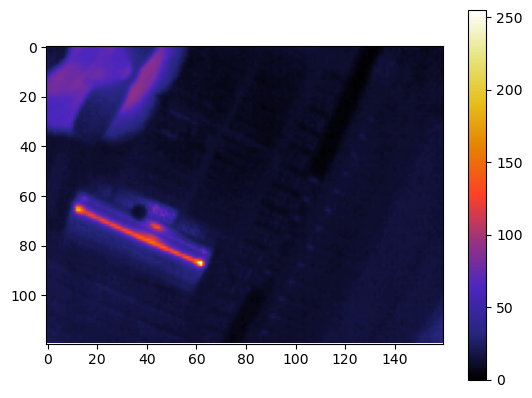

In [41]:
plt.imshow(lum_img, interpolation="antialiased", cmap="CMRmap")
plt.colorbar()
plt.show()


In [ ]:
base64.encode()

In [42]:
lum_img

array([[19, 16, 16, ...,  9, 10,  7],
       [20, 16, 15, ...,  9, 10, 11],
       [18, 14, 15, ..., 10, 10,  9],
       ...,
       [22, 19, 19, ..., 30, 30, 33],
       [21, 21, 20, ..., 28, 30, 32],
       [24, 20, 20, ..., 28, 29, 33]], dtype=uint8)

In [46]:
class Person:
    def __init__(self, name, age): # "self" can be of another name but it has to be the first parameter
        self.name = name
        self.age = age
    def get_name(self):
        return self.name


mil = Person("Mil", 23)
print(mil.get_name())


Mil
